# Cancer Dataset
Apply all data analysis you had learn and choose a suitable 4 ML models to apply them on these data
Note: the output column is Diagnosis where
Benign cancer (B) : cancer at normal stage
Malignant cancer (M) : cancer very dangerous

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")
sns.set(rc={'figure.figsize': [15, 9]}, font_scale=1.3)
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r'./data/Cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Data Exploration

In [5]:
# all data is numeric but the diagnosis is object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# dataset is small
df.shape

(569, 32)

In [7]:
# dataset have no nan values
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
print('Number of Duplicates:', df.duplicated().sum())

Number of Duplicates: 0


In [9]:
# delete un data
df.drop('id',axis=1,inplace=True)

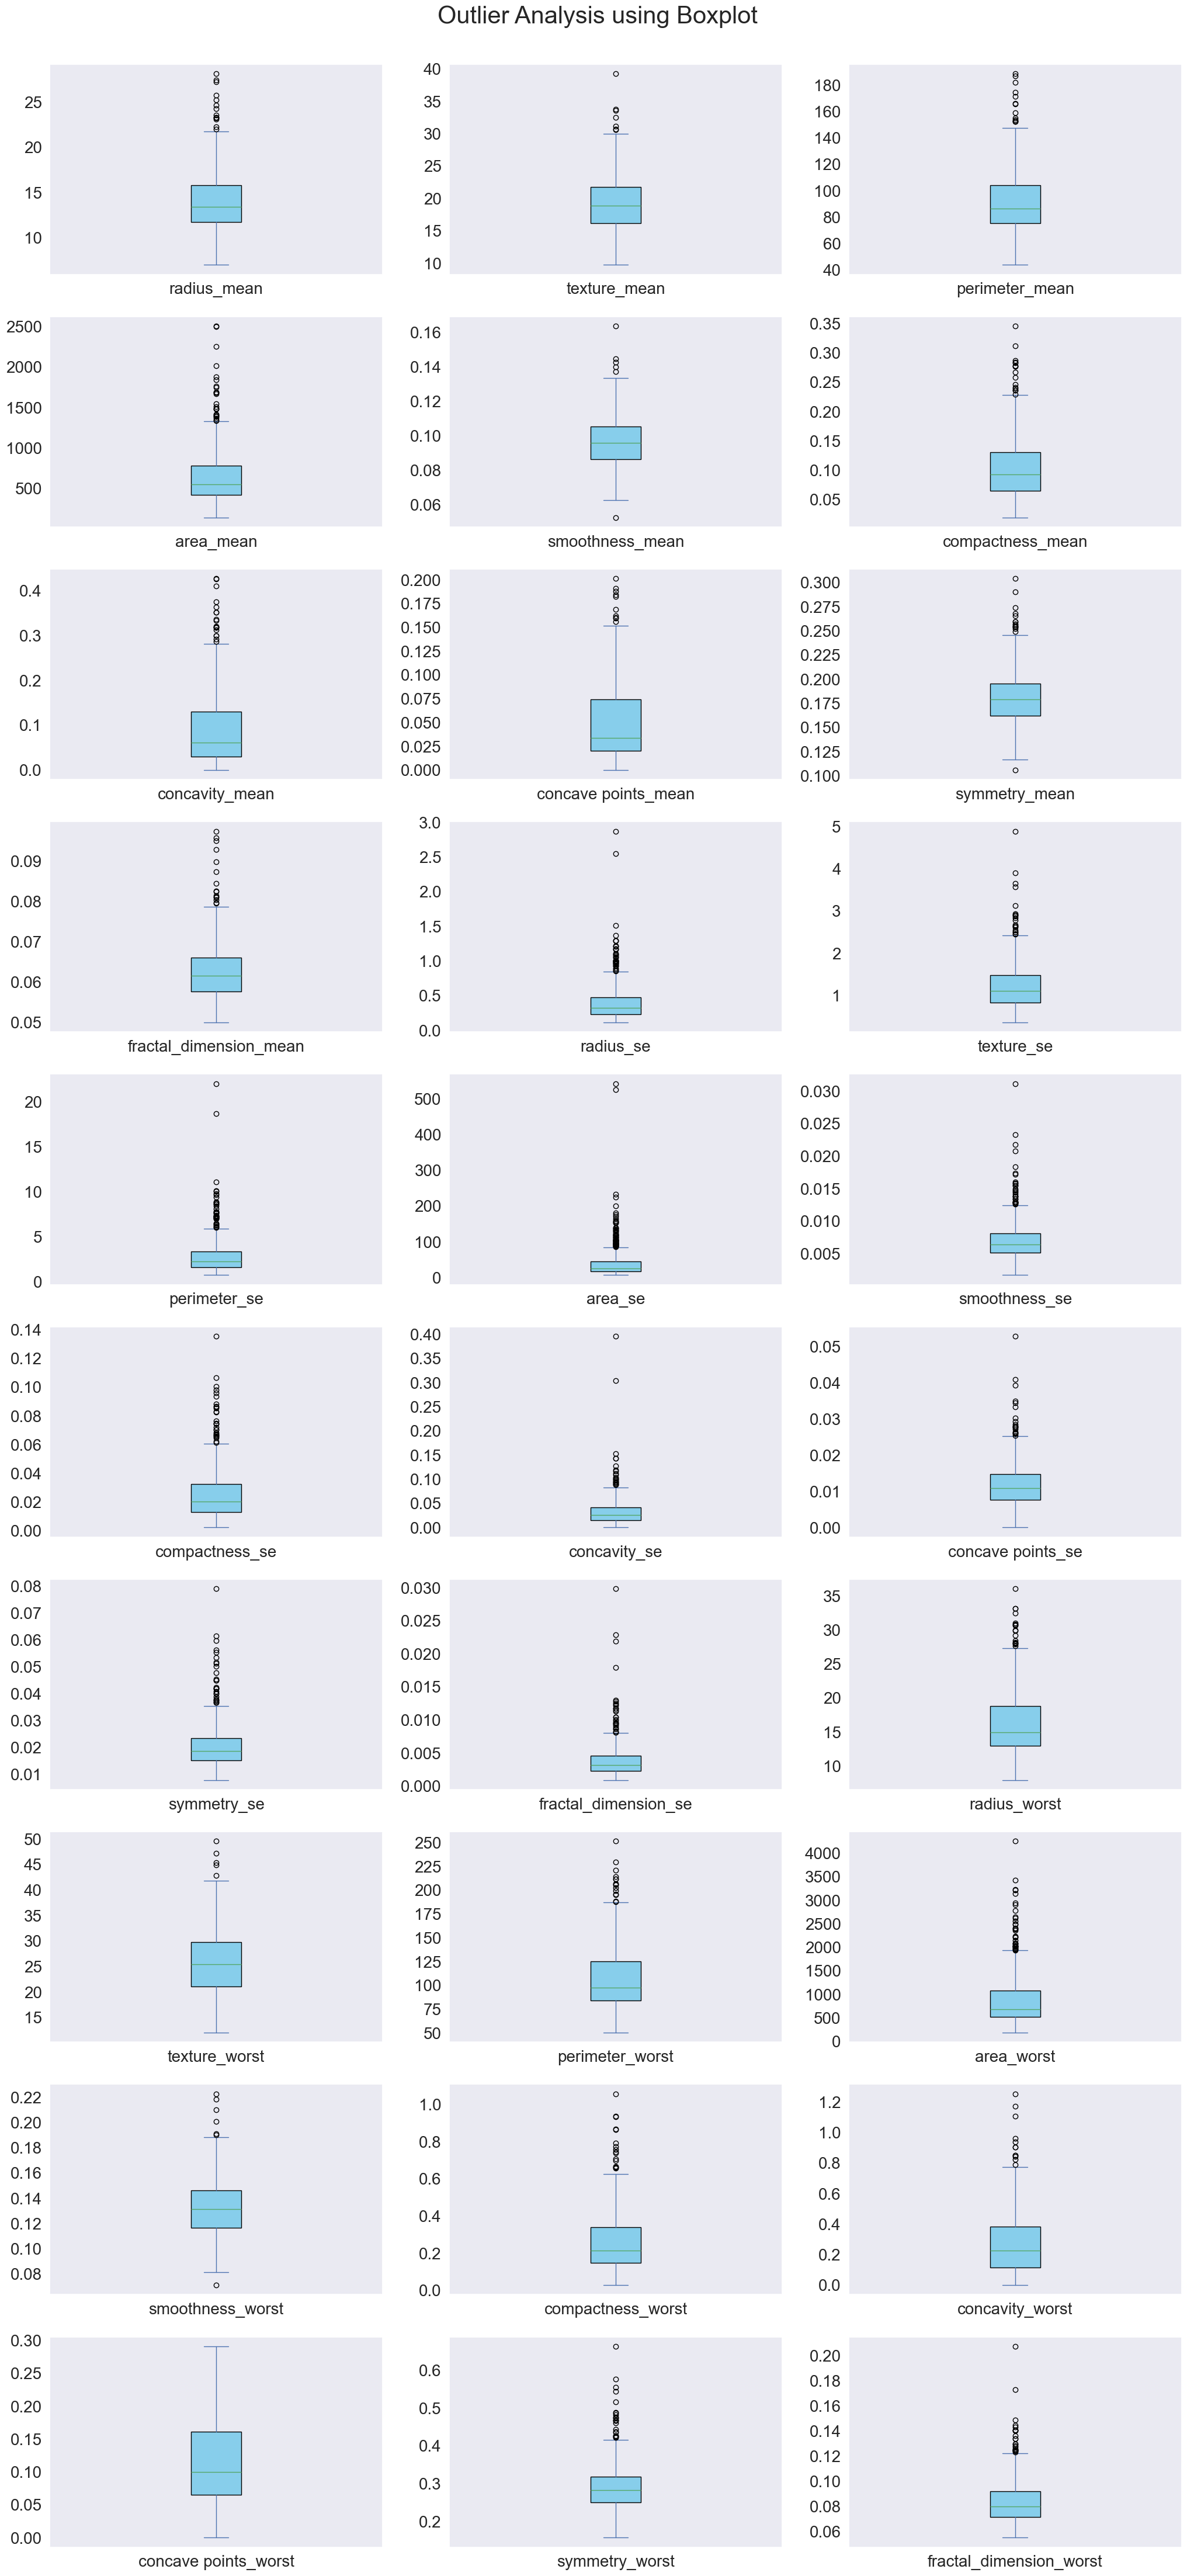

In [10]:
boxprops = dict(facecolor='skyblue', edgecolor='black', linewidth=1)
df.plot.box(figsize=(25,50),subplots=True,layout=(10,3),patch_artist=True,grid=False,boxprops=boxprops,fontsize=20)
plt.suptitle('Outlier Analysis using Boxplot', fontsize=30)
plt.subplots_adjust(top=0.96)
plt.show()

In [11]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols: 
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    condition = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
    mean = df[col].mean()
    # Replace outlier values with the mean as the data is small
    df.loc[condition, col] = mean

In [12]:
df.shape

(569, 31)

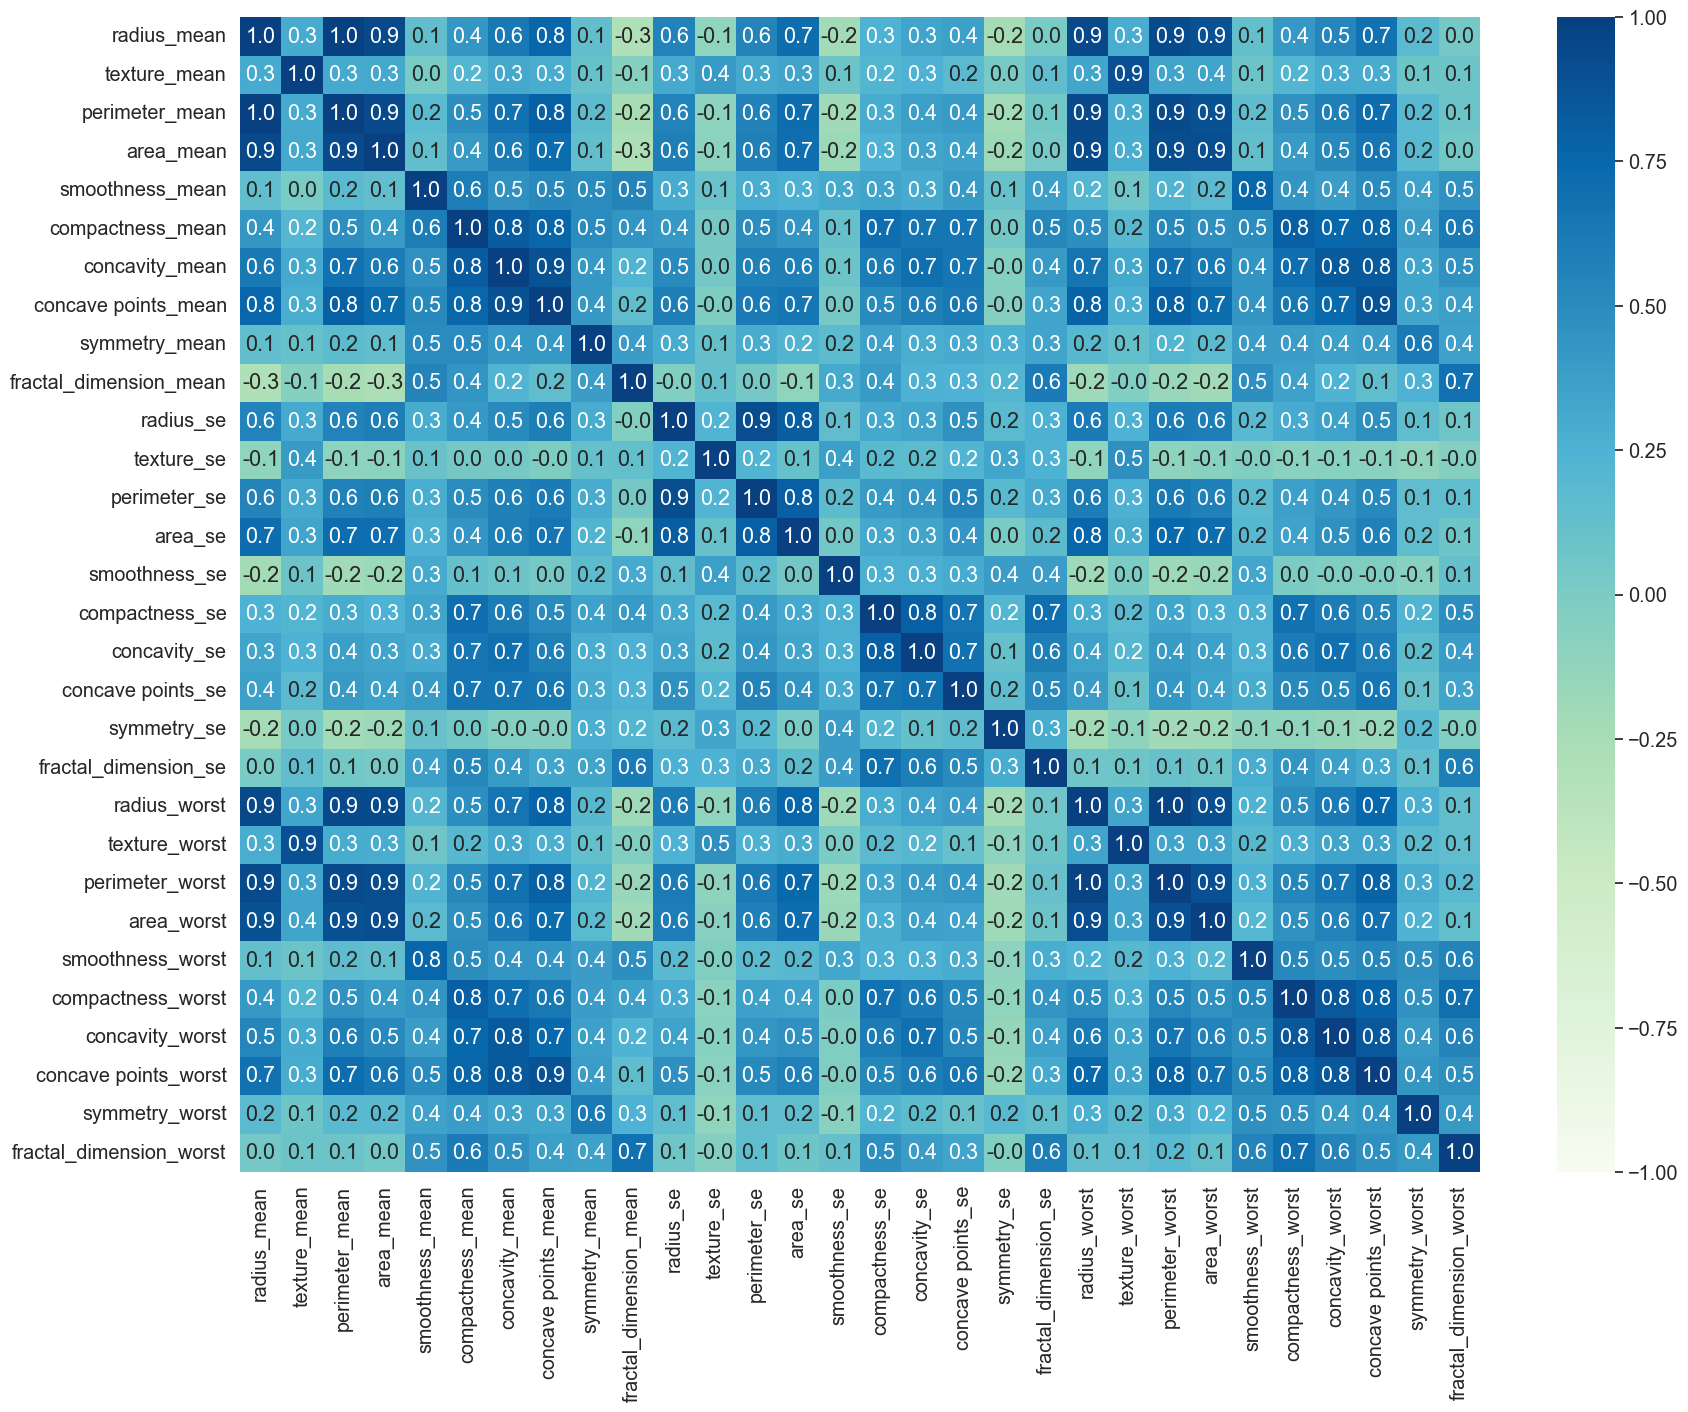

In [13]:
plt.subplots(figsize=(20,15))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt='.1f',vmax=1,vmin=-1,cmap='GnBu')
plt.show()

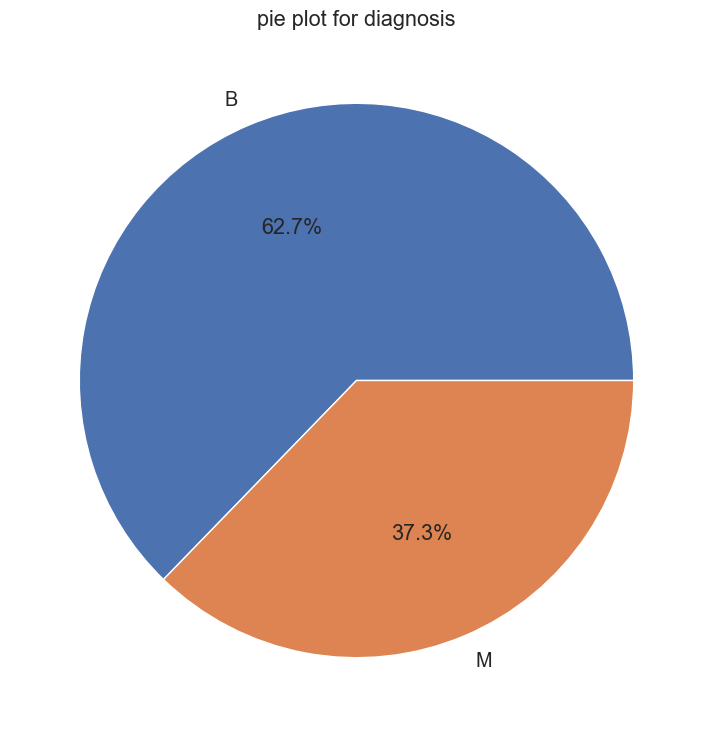

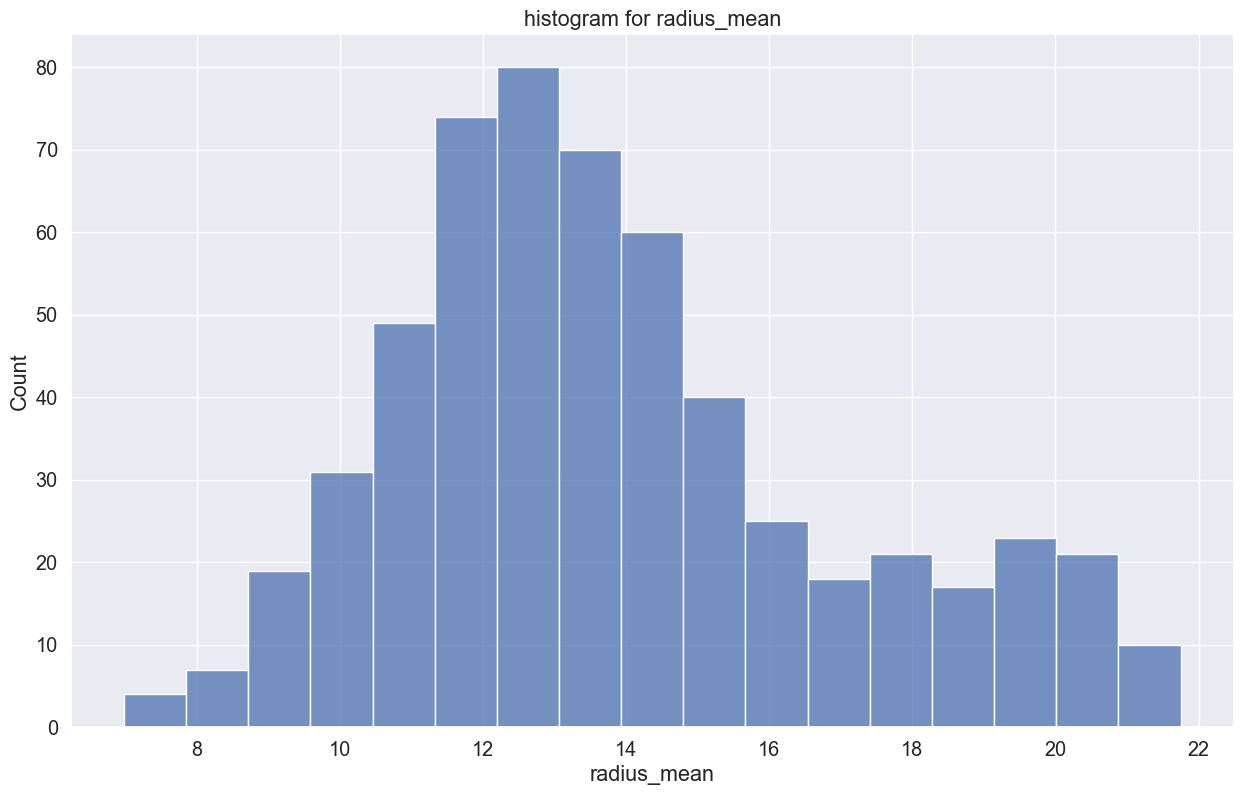

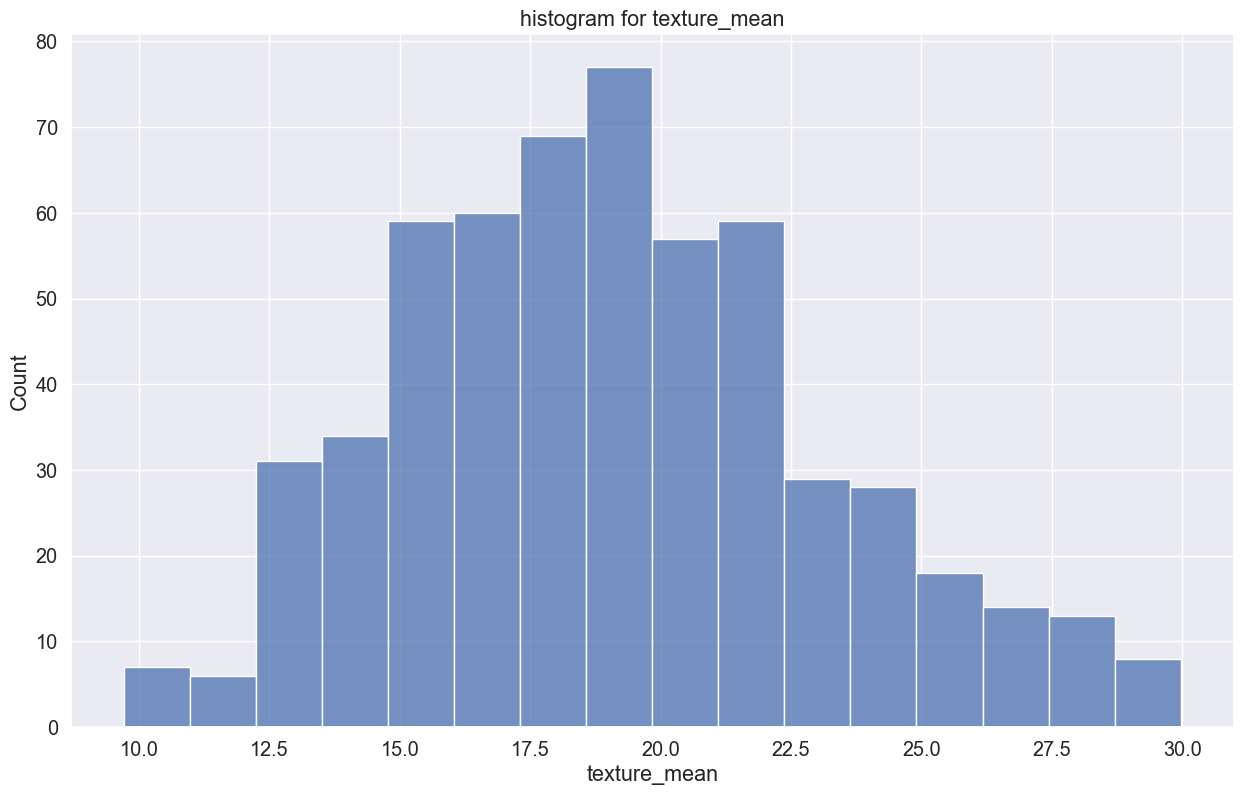

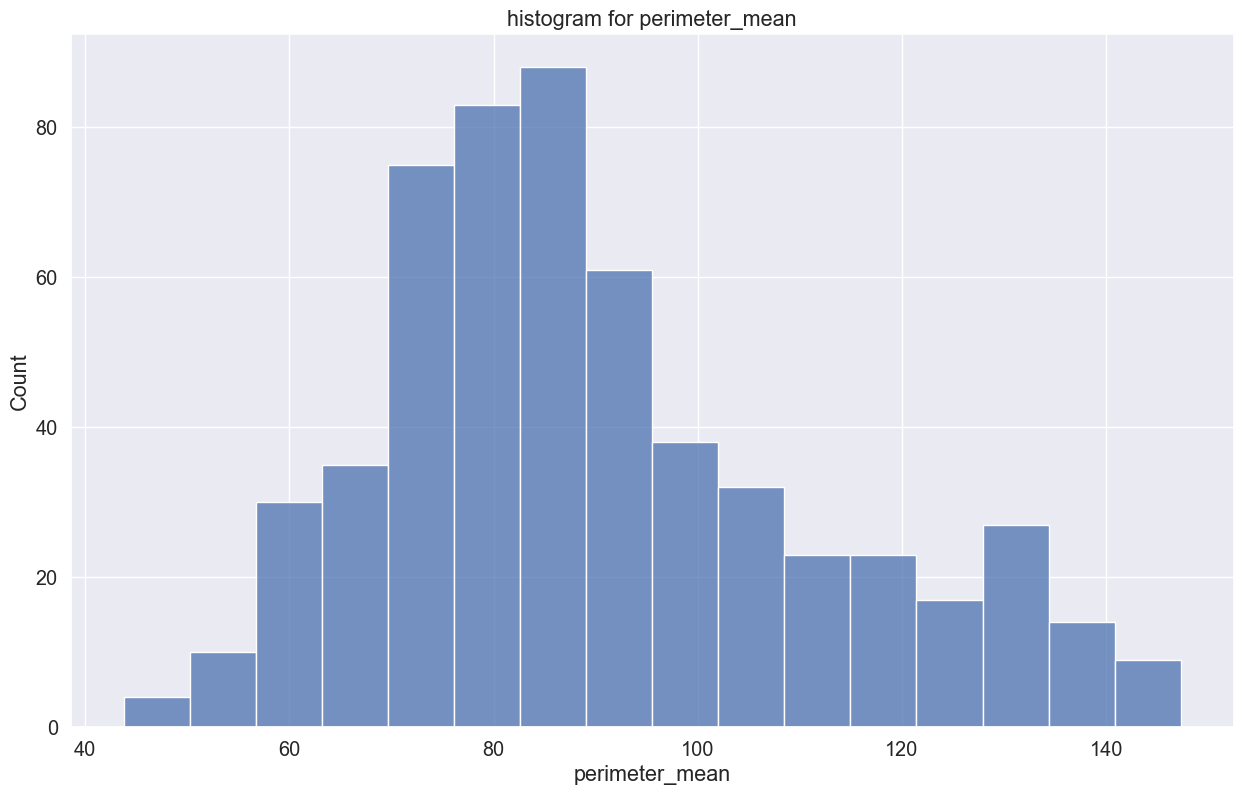

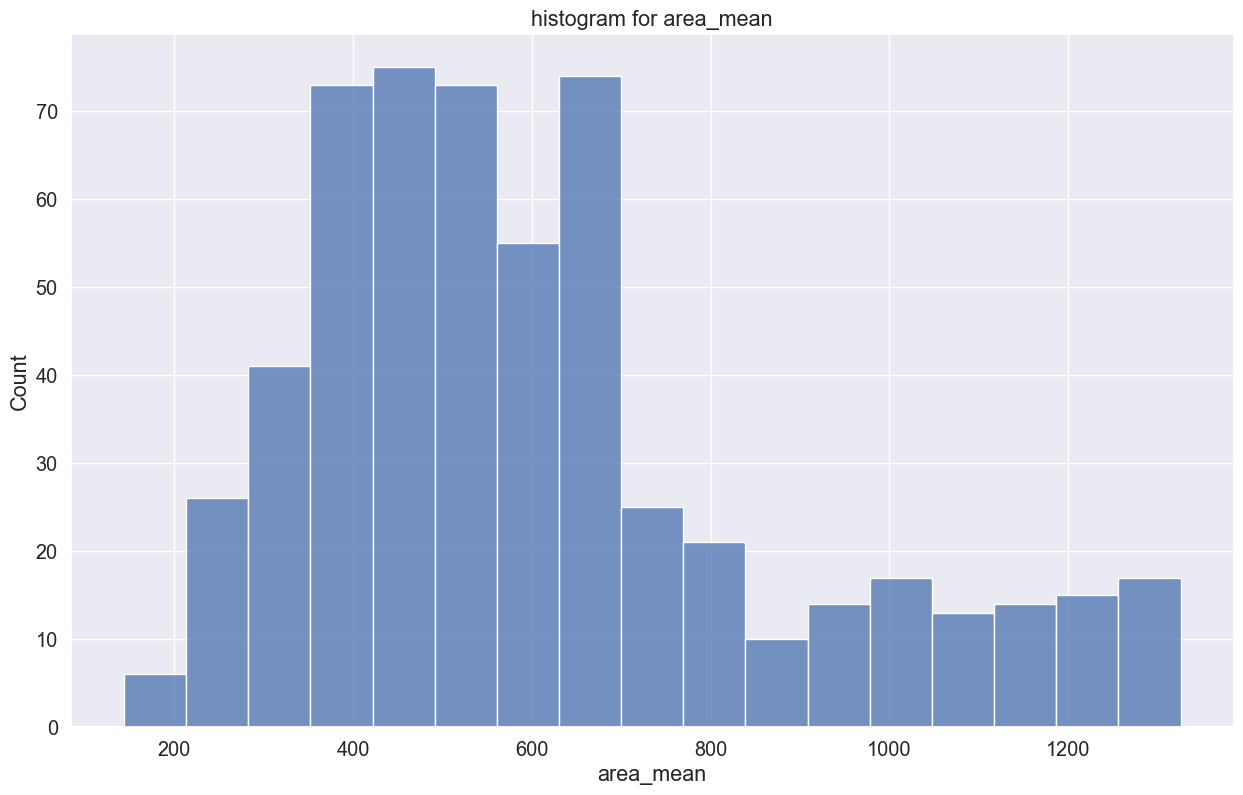

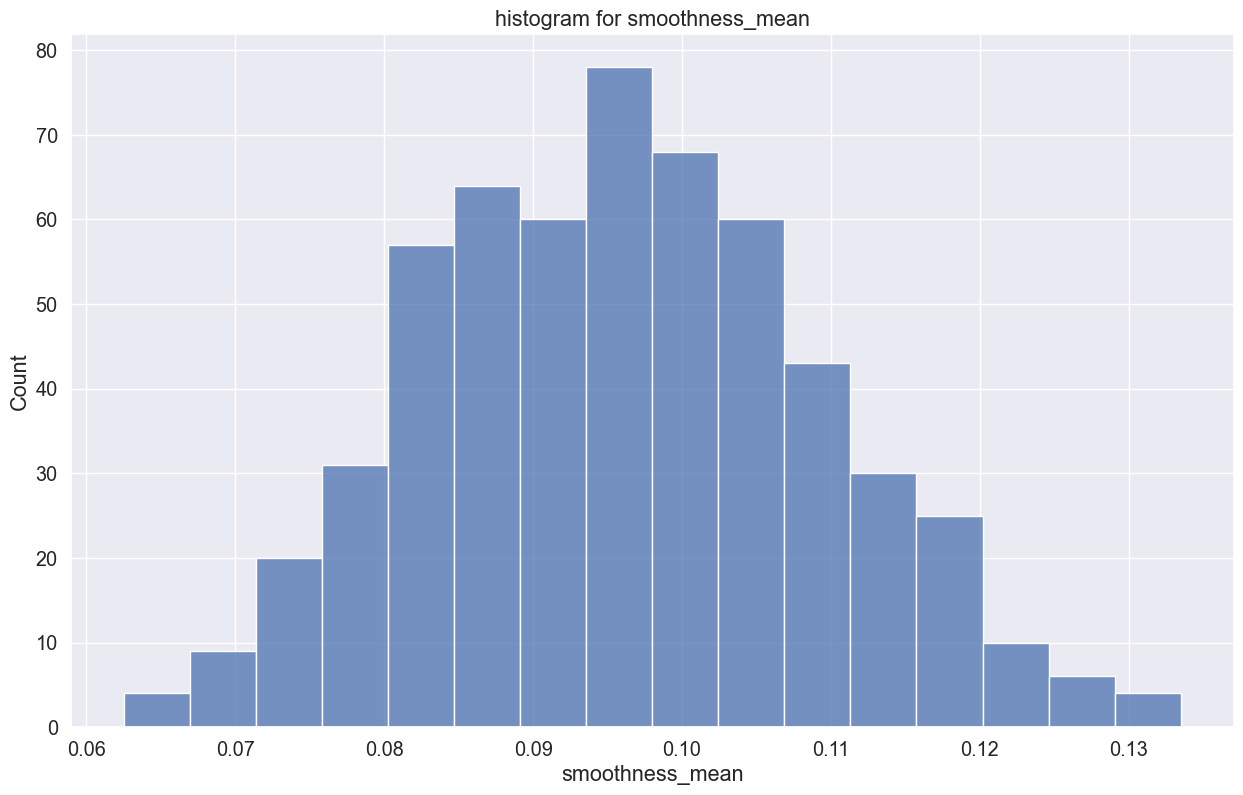

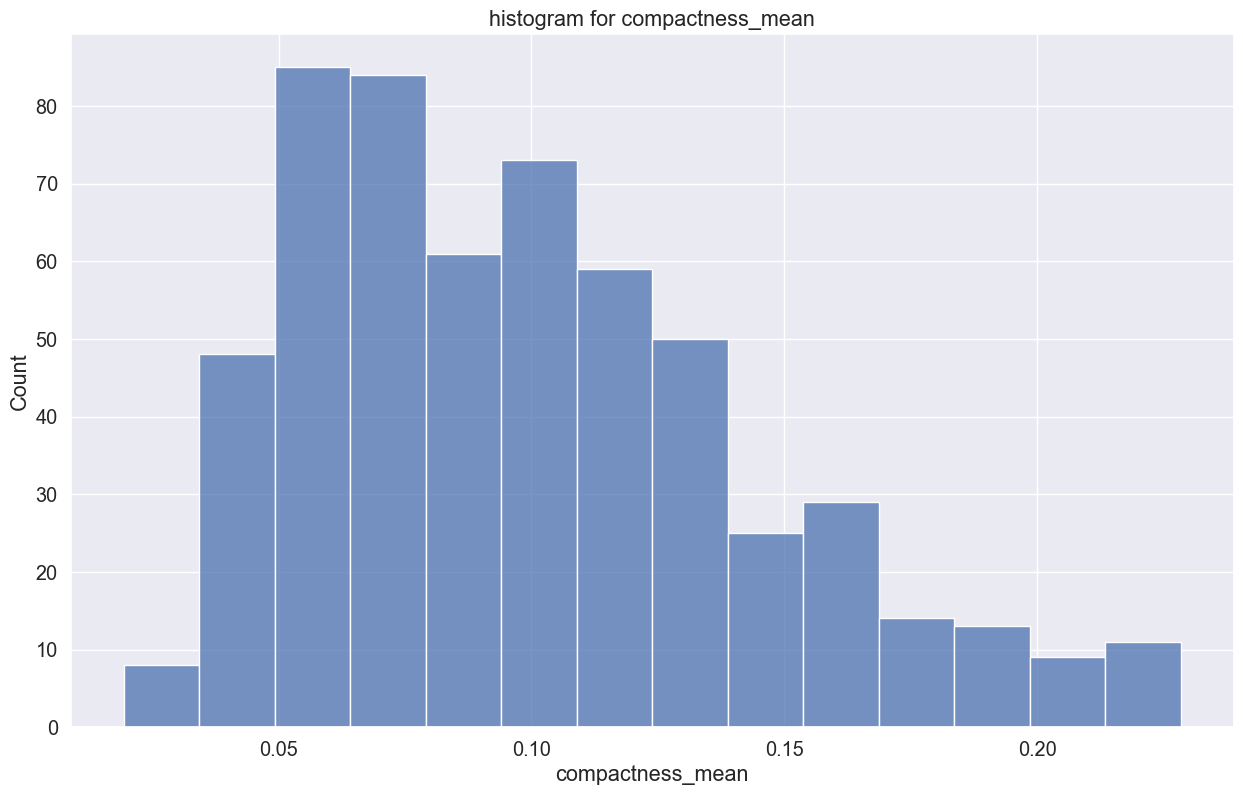

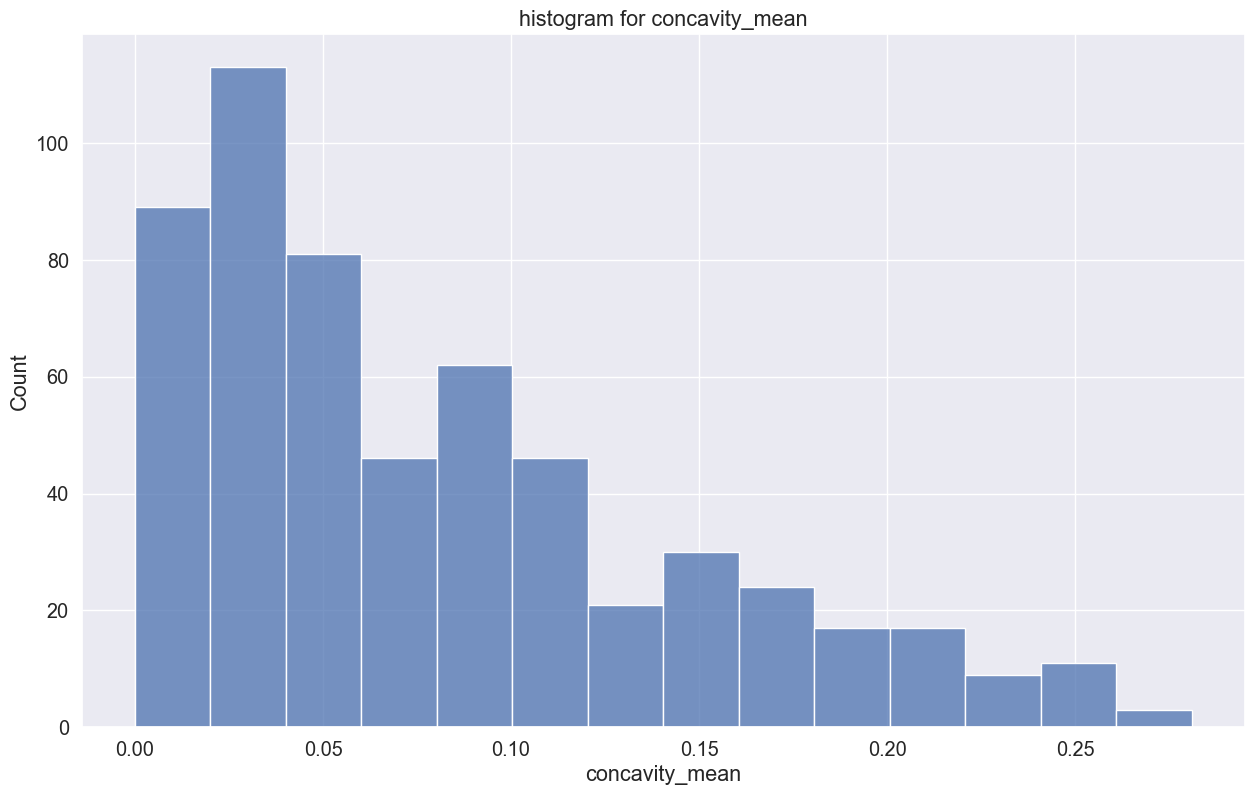

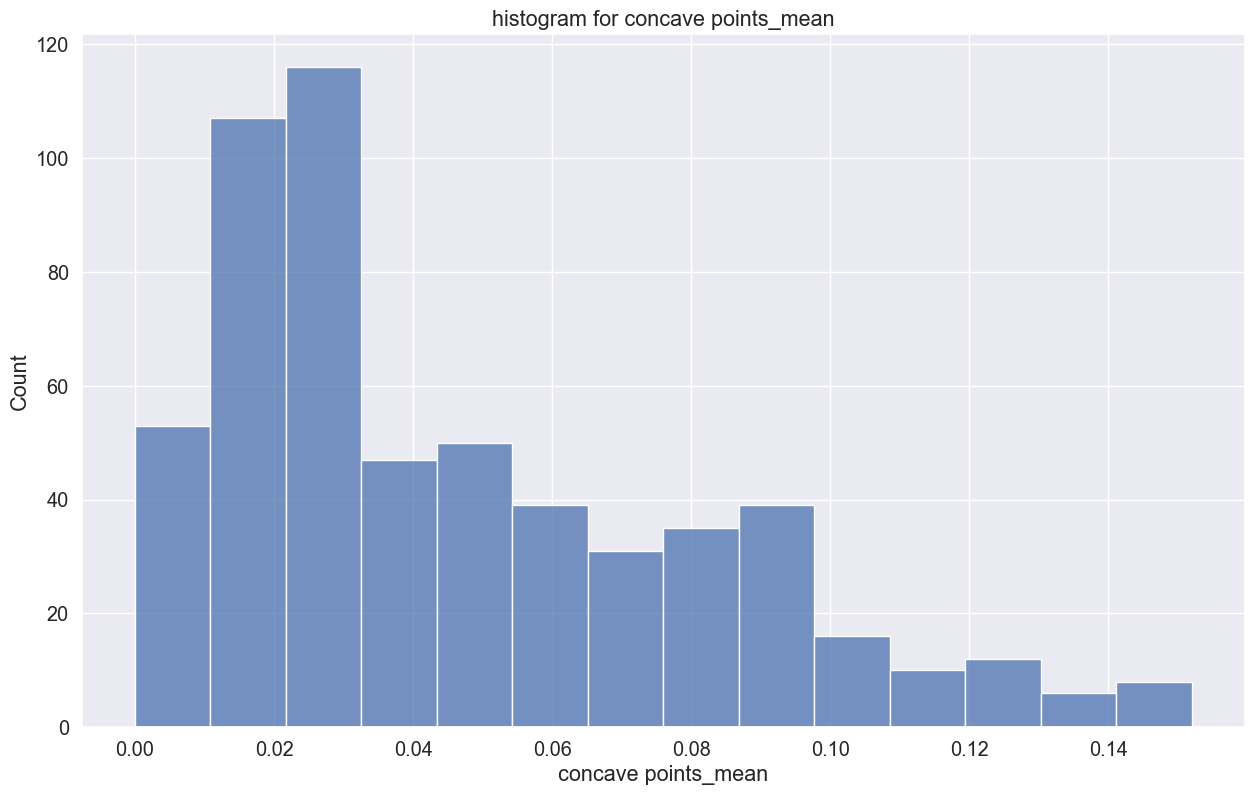

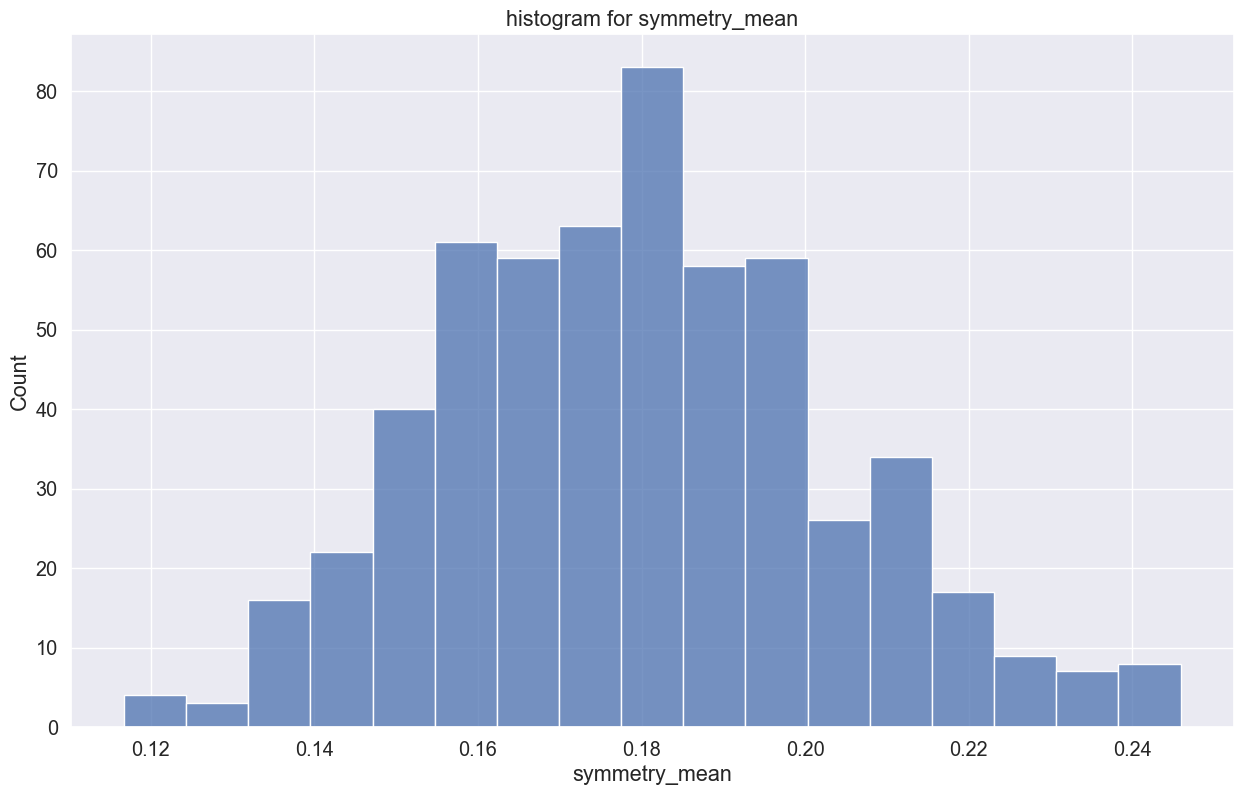

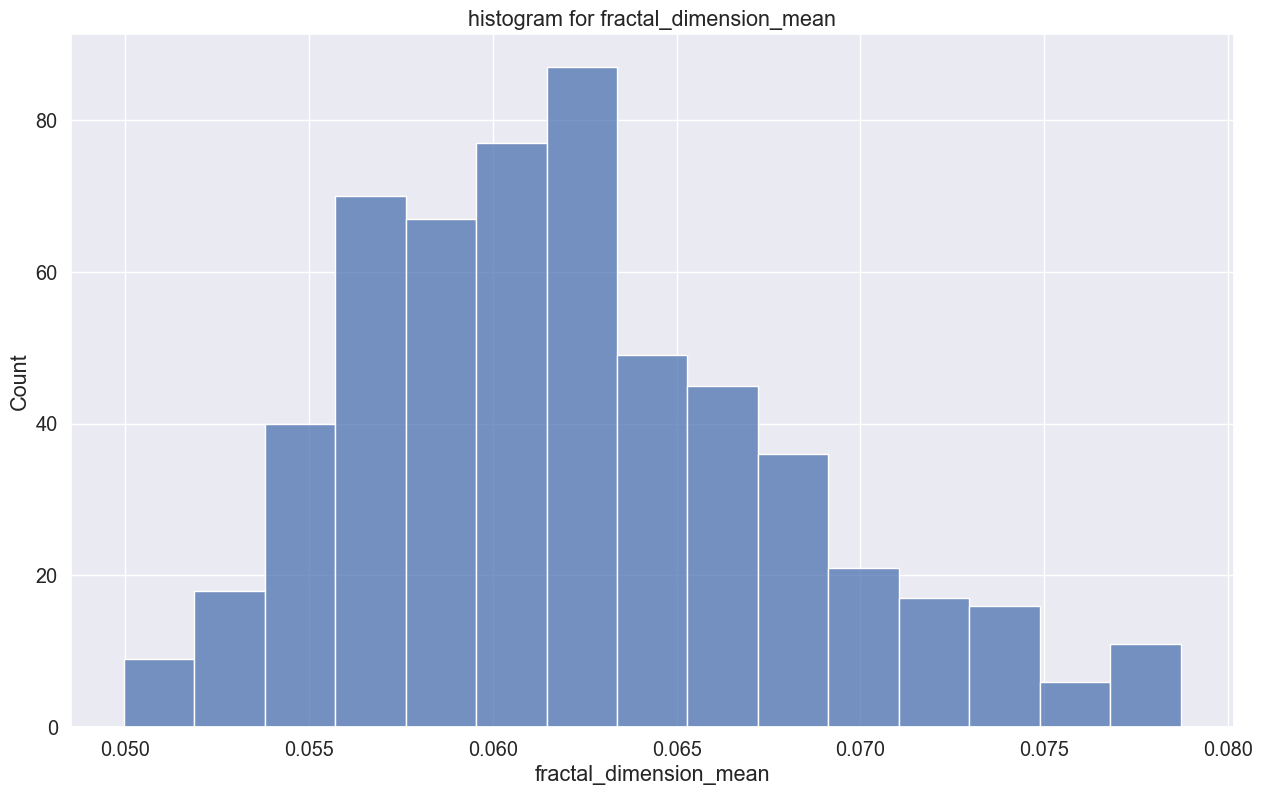

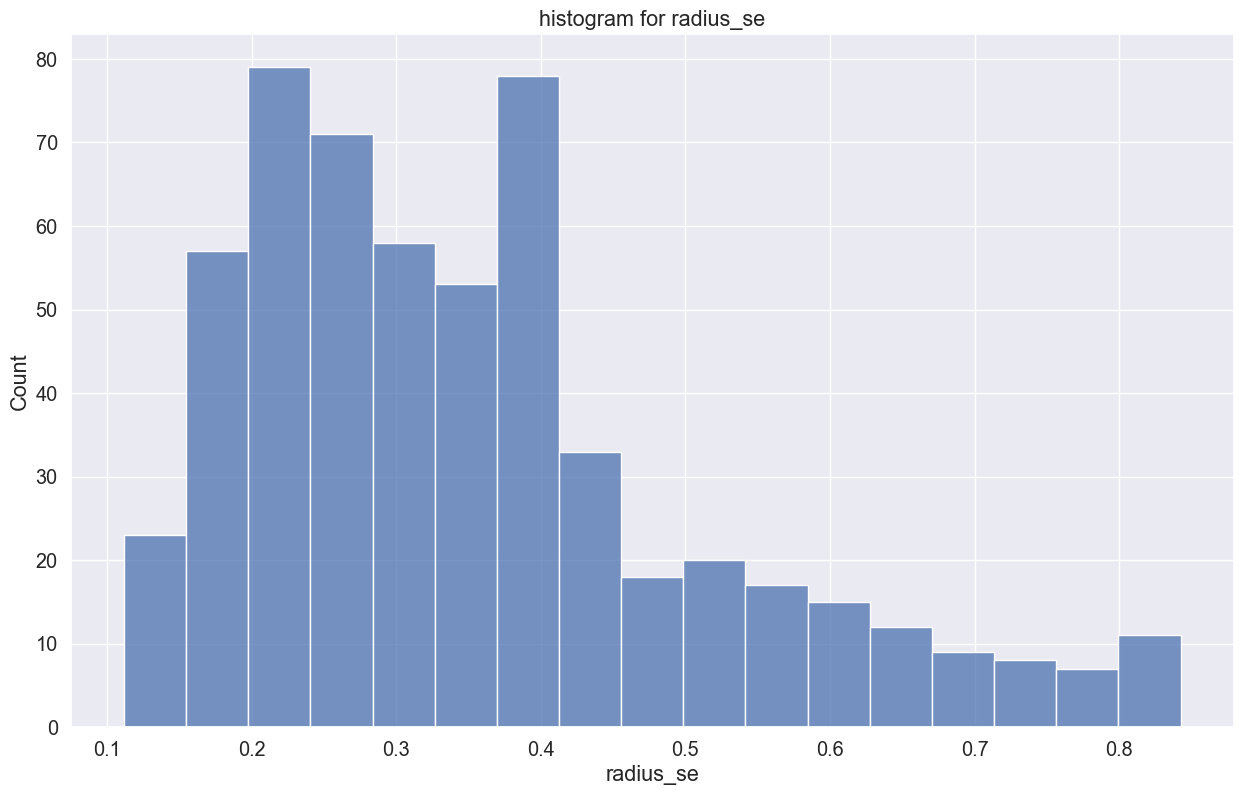

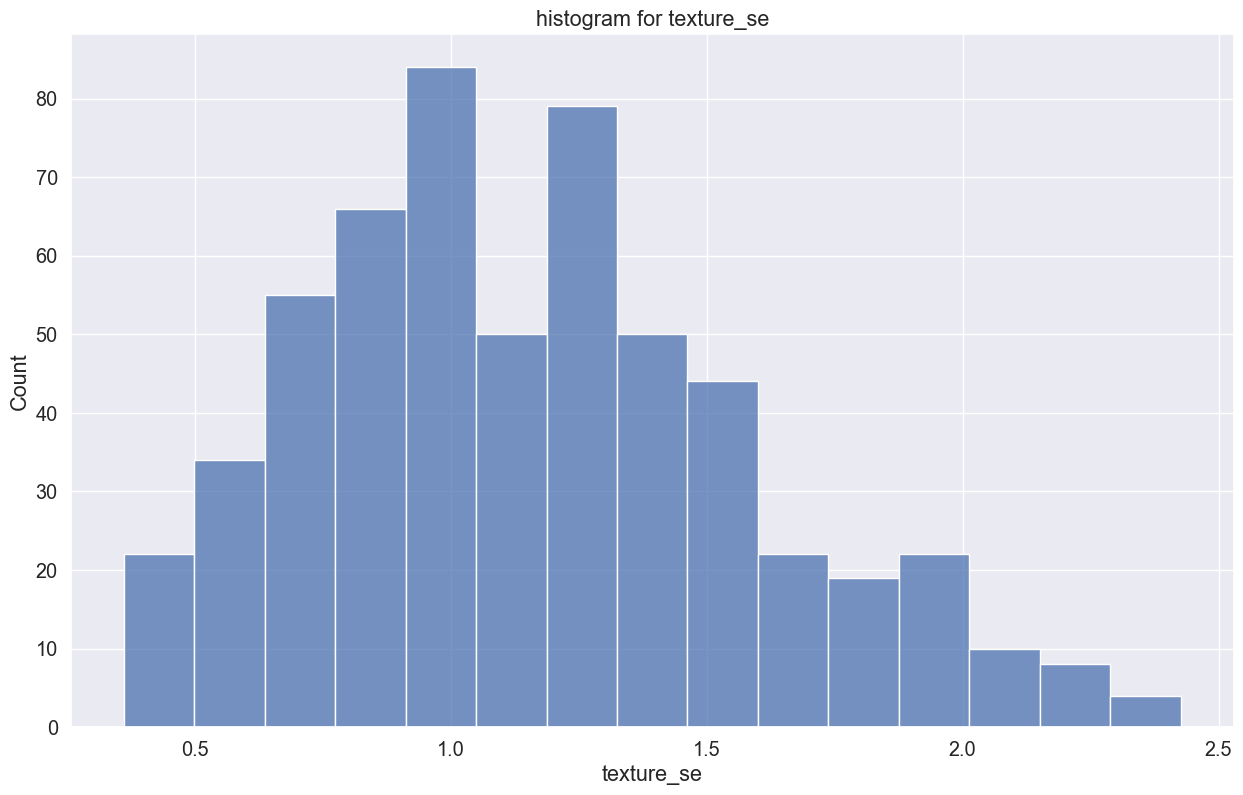

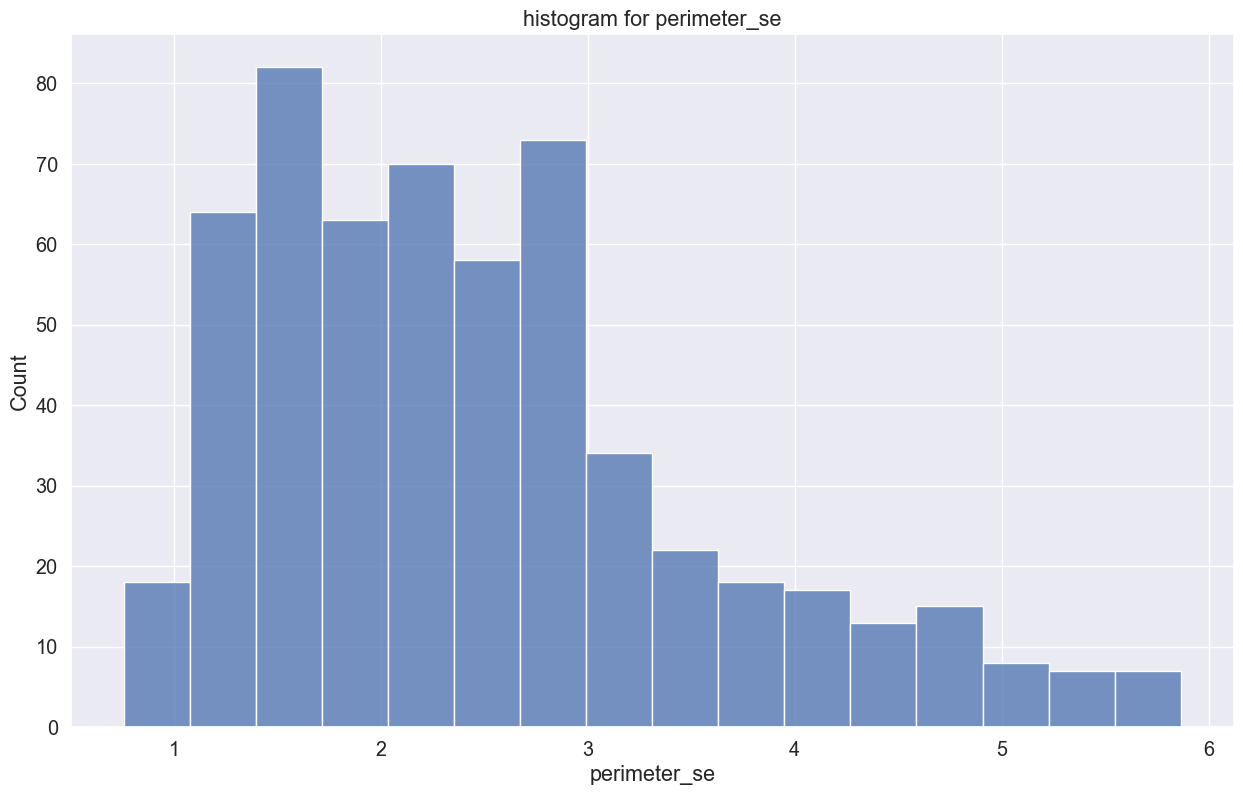

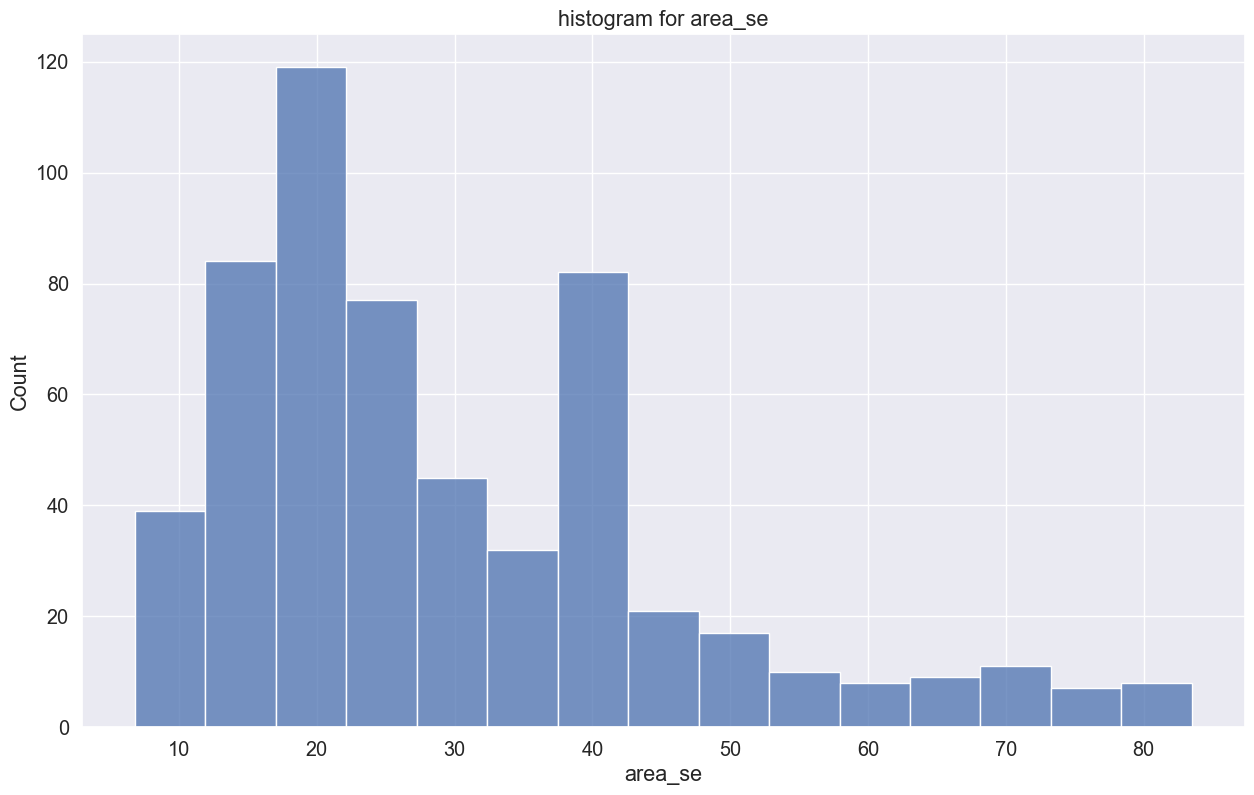

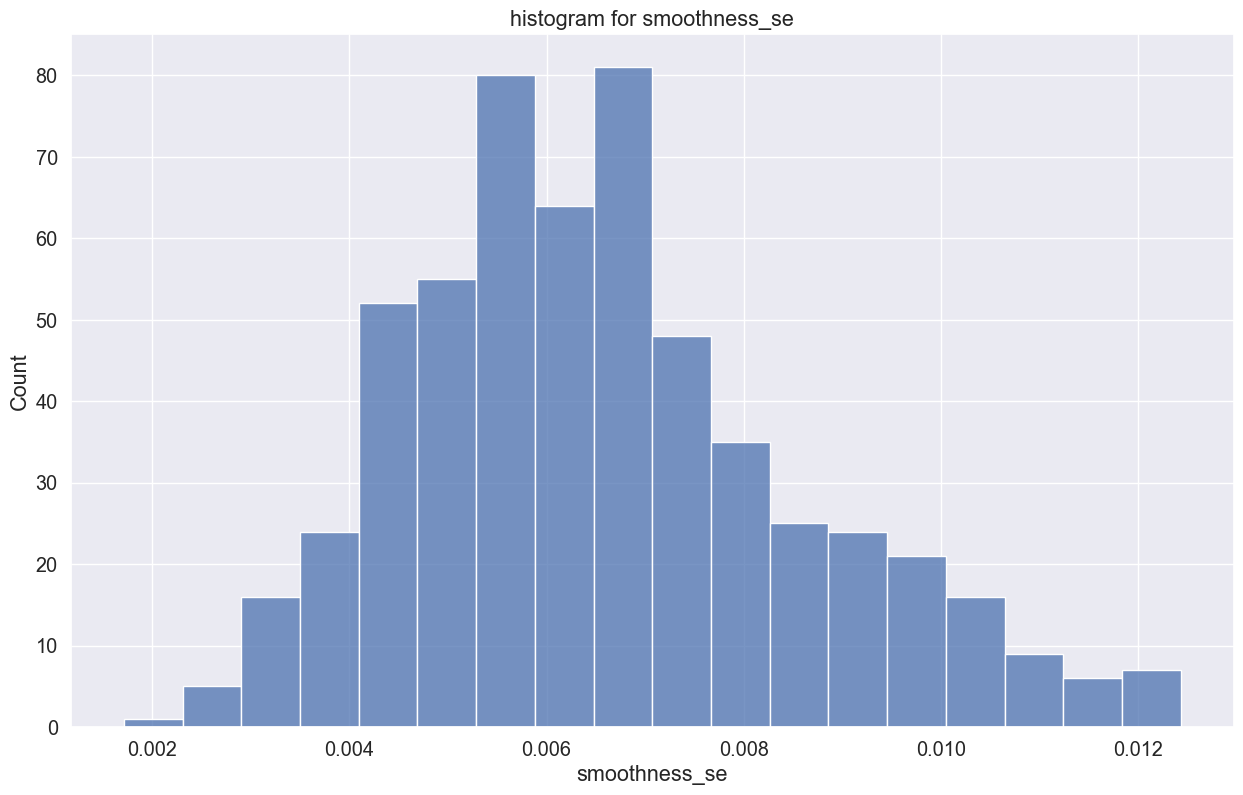

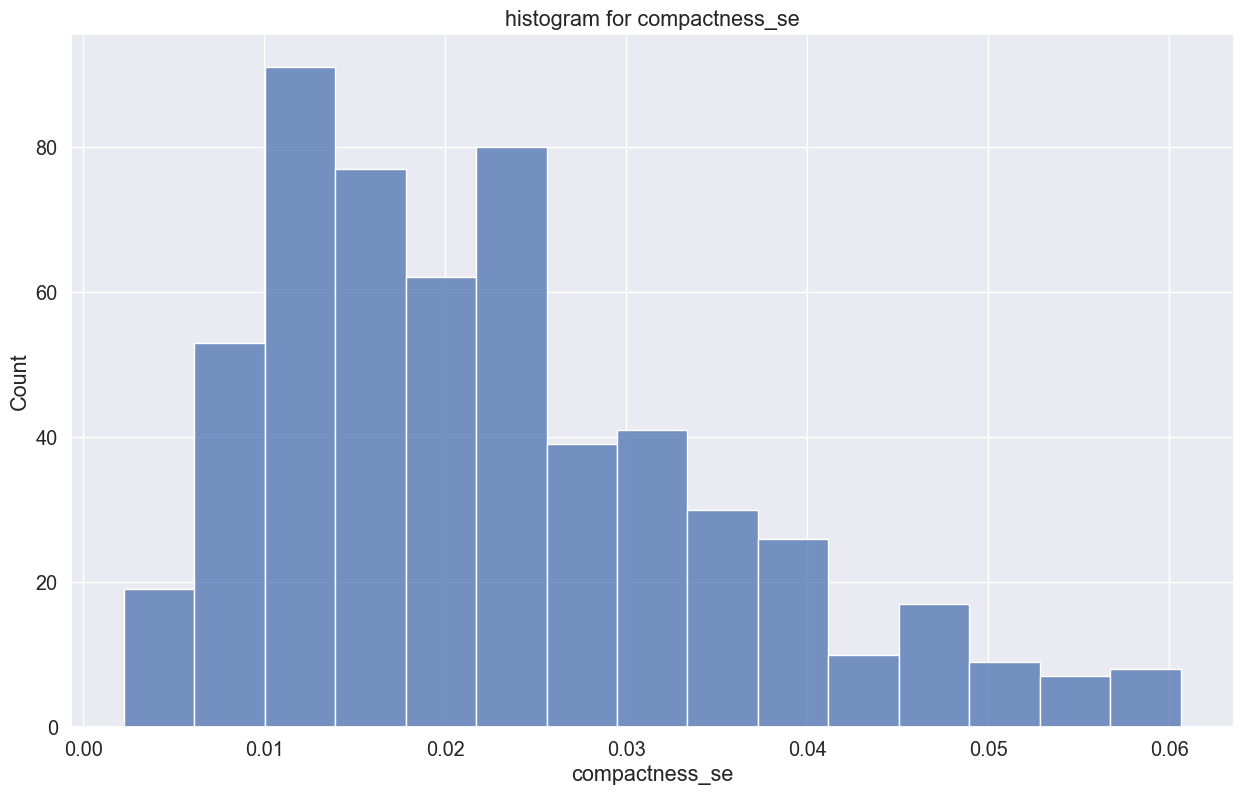

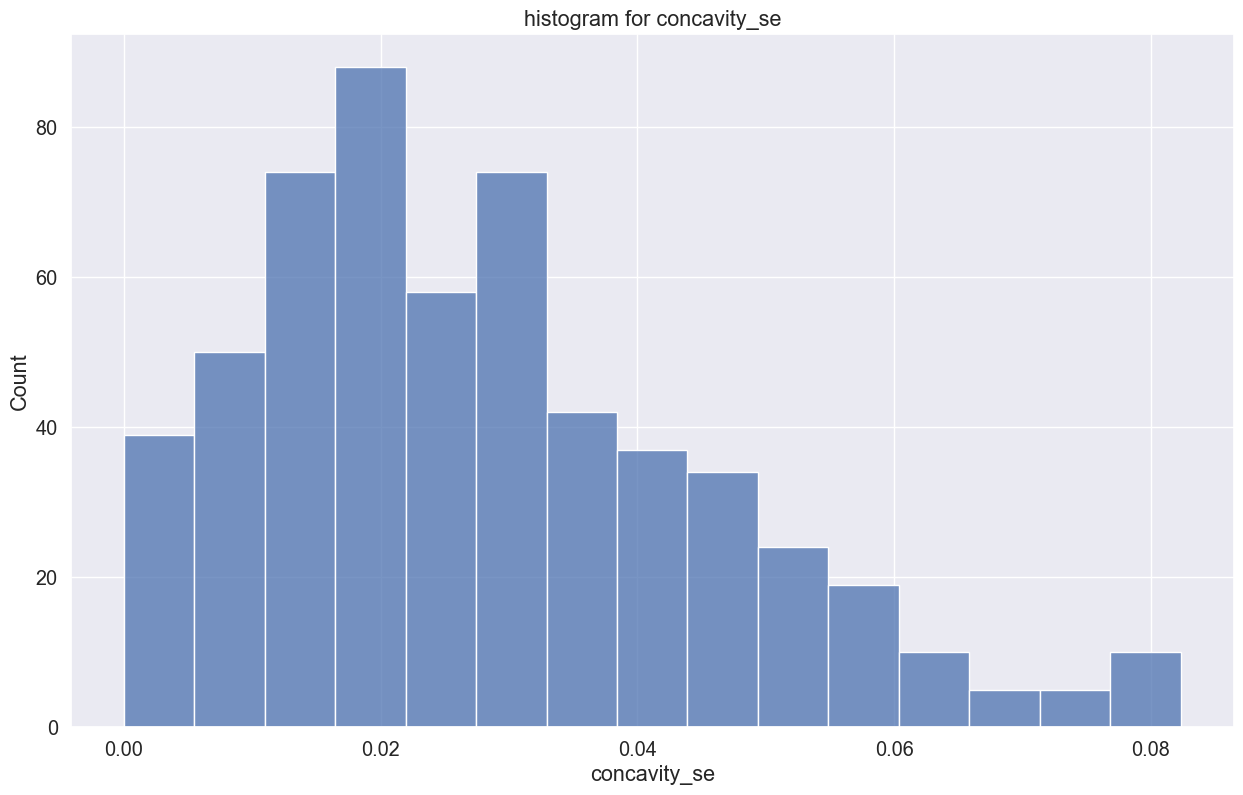

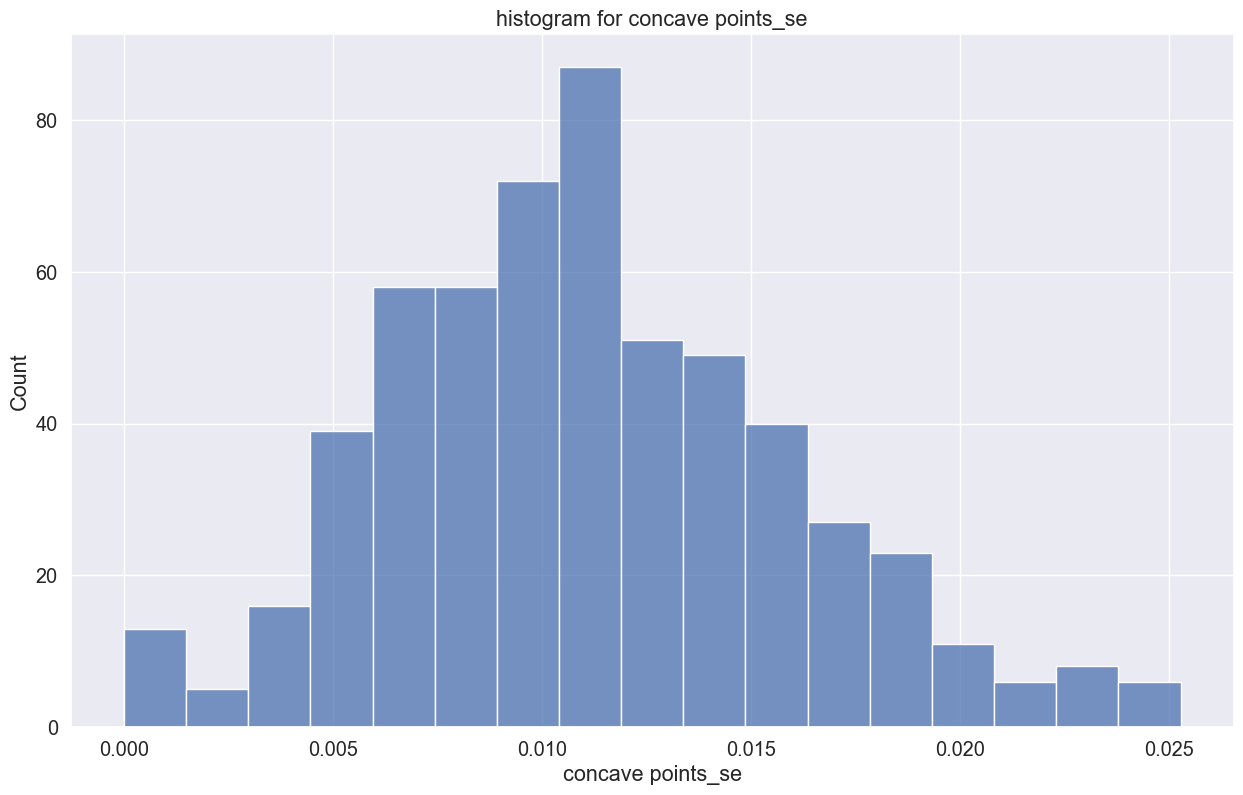

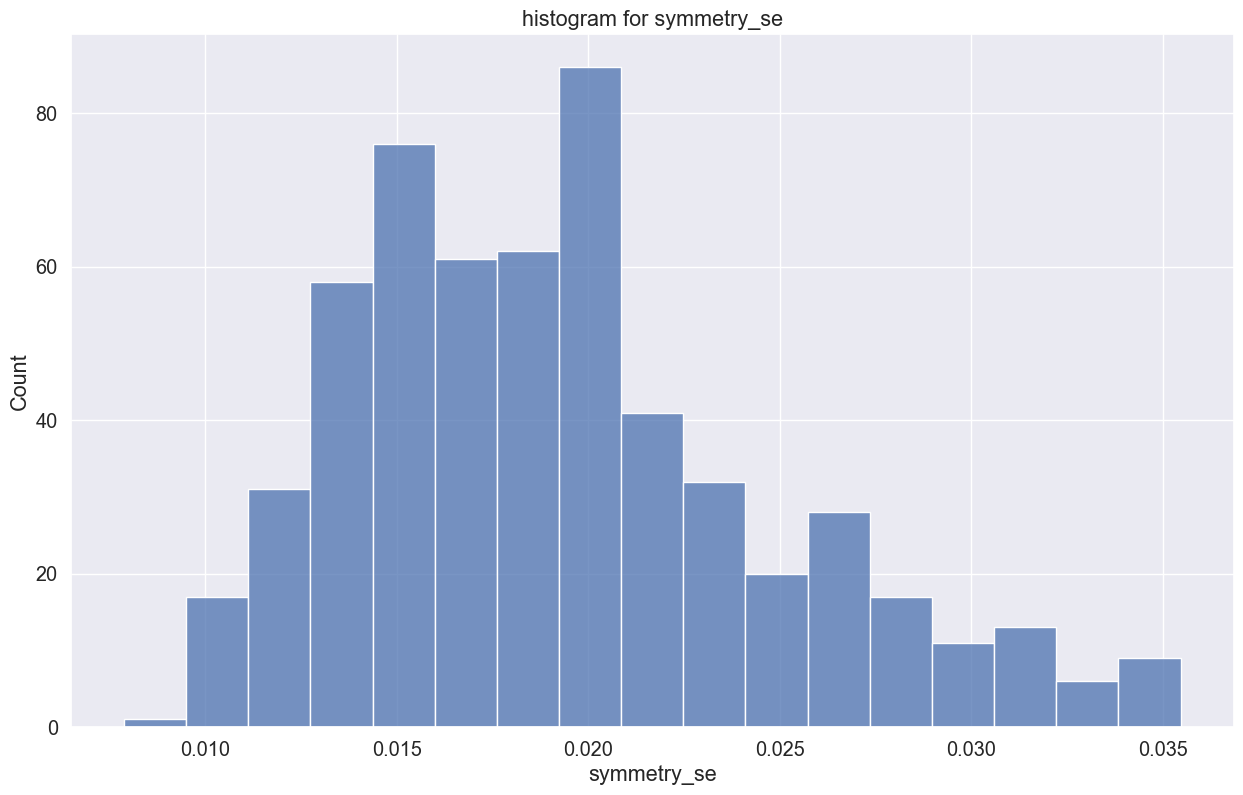

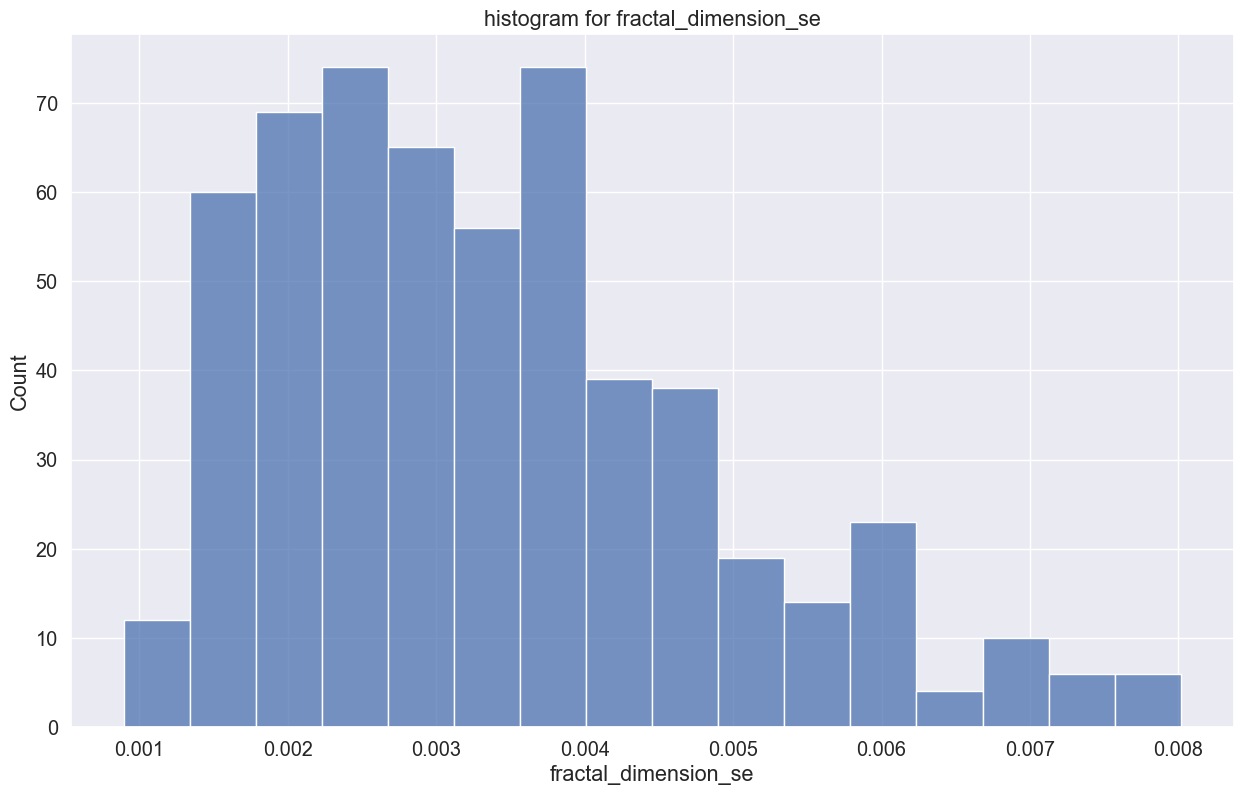

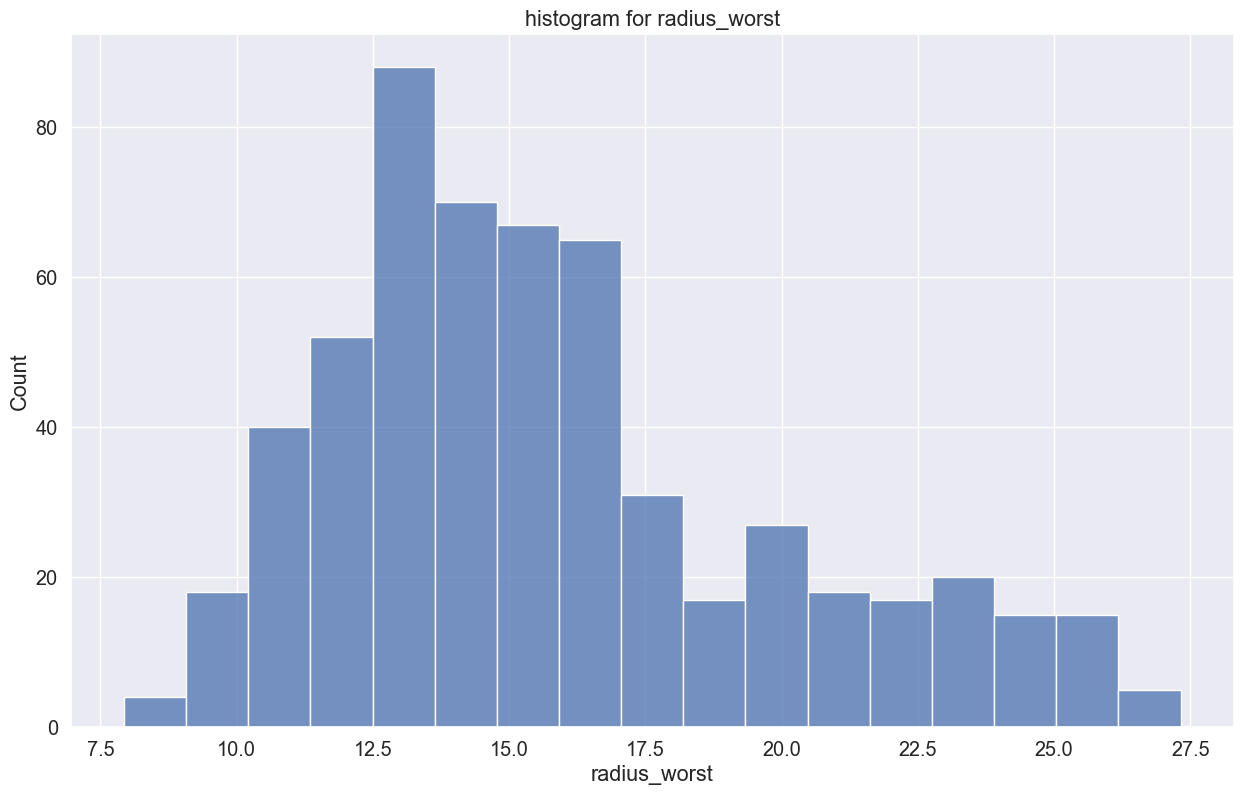

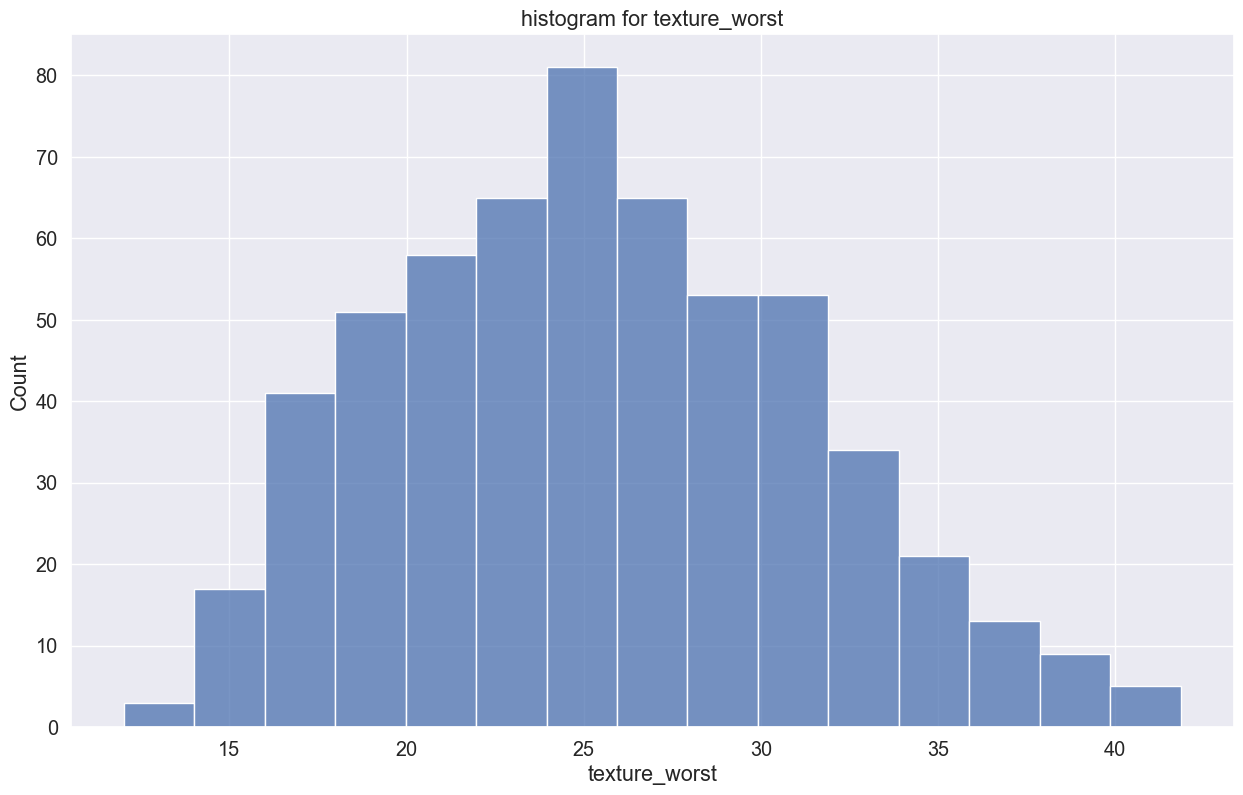

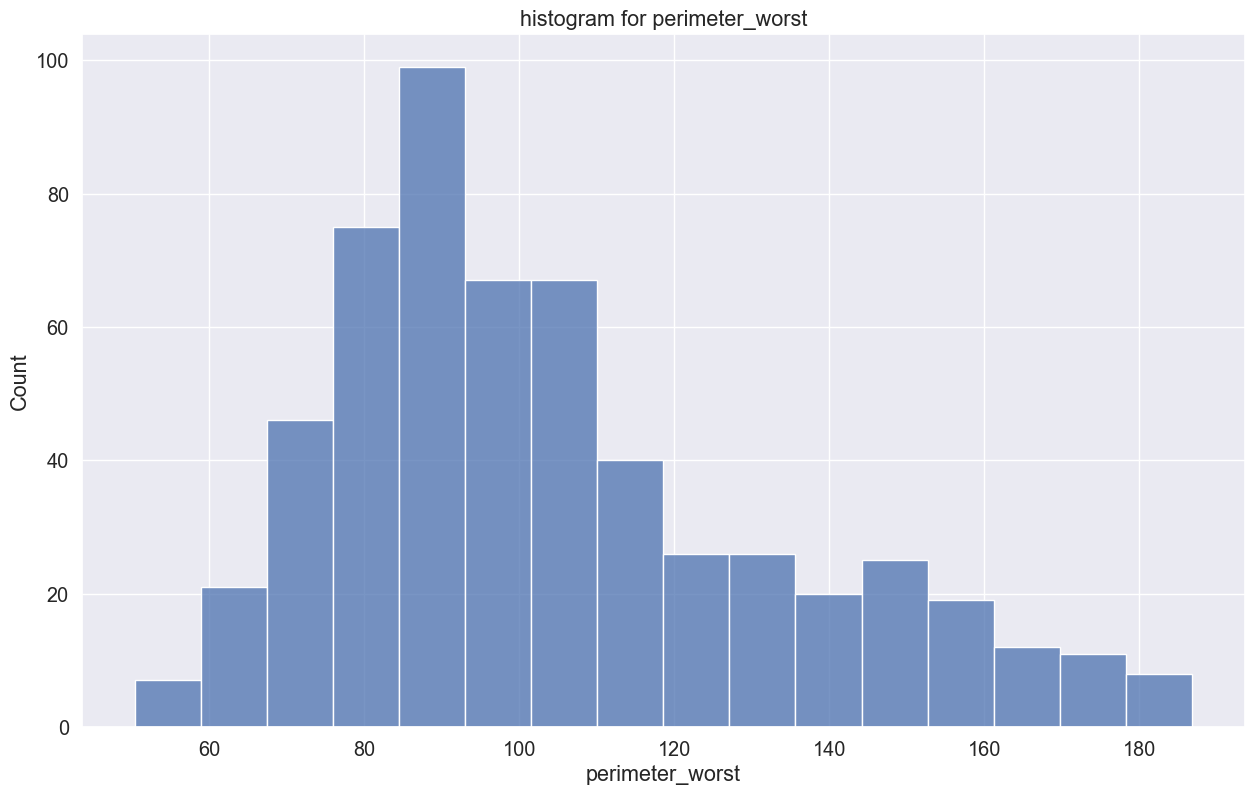

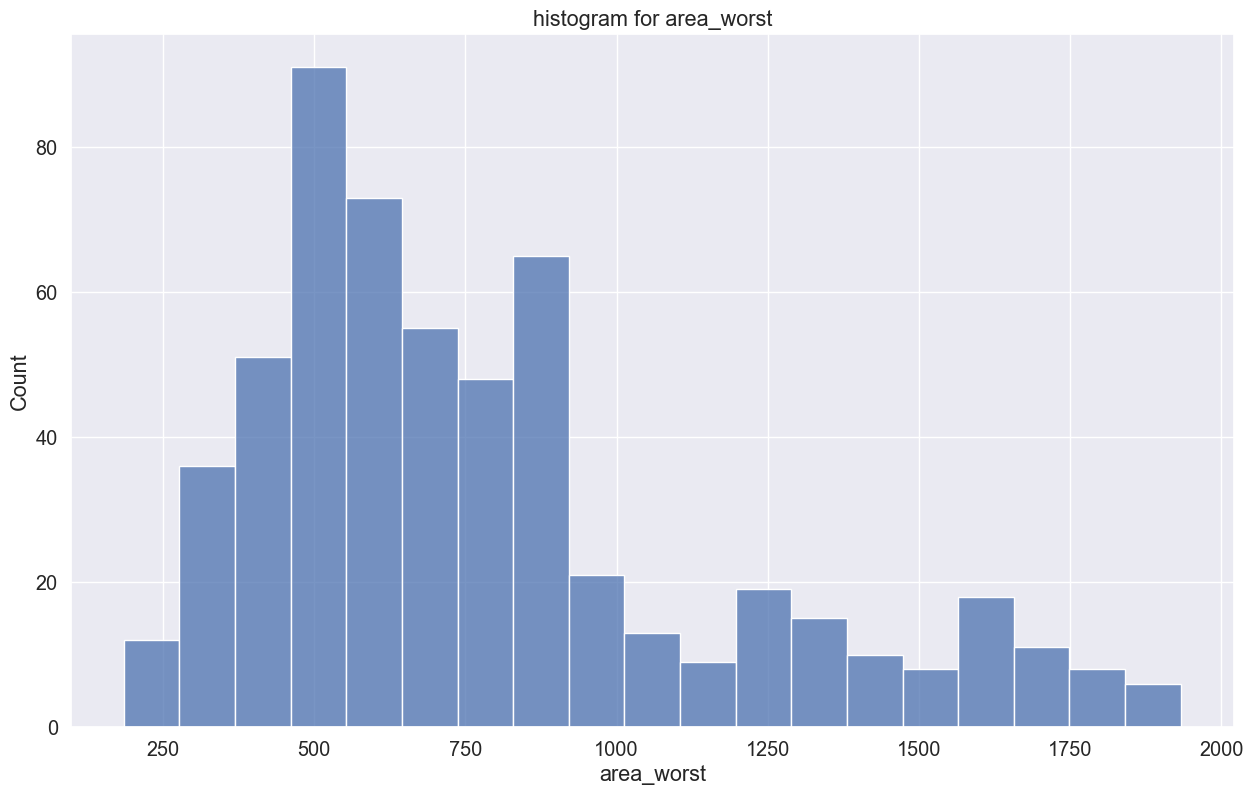

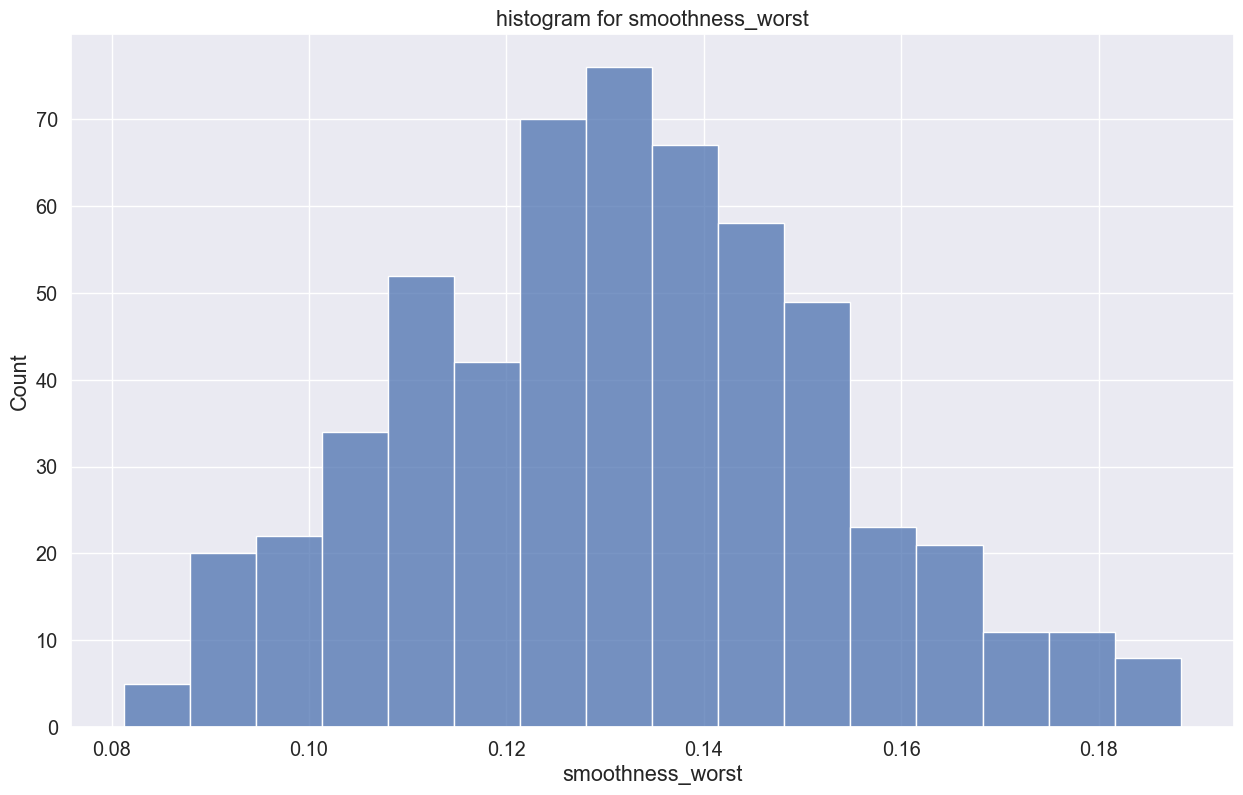

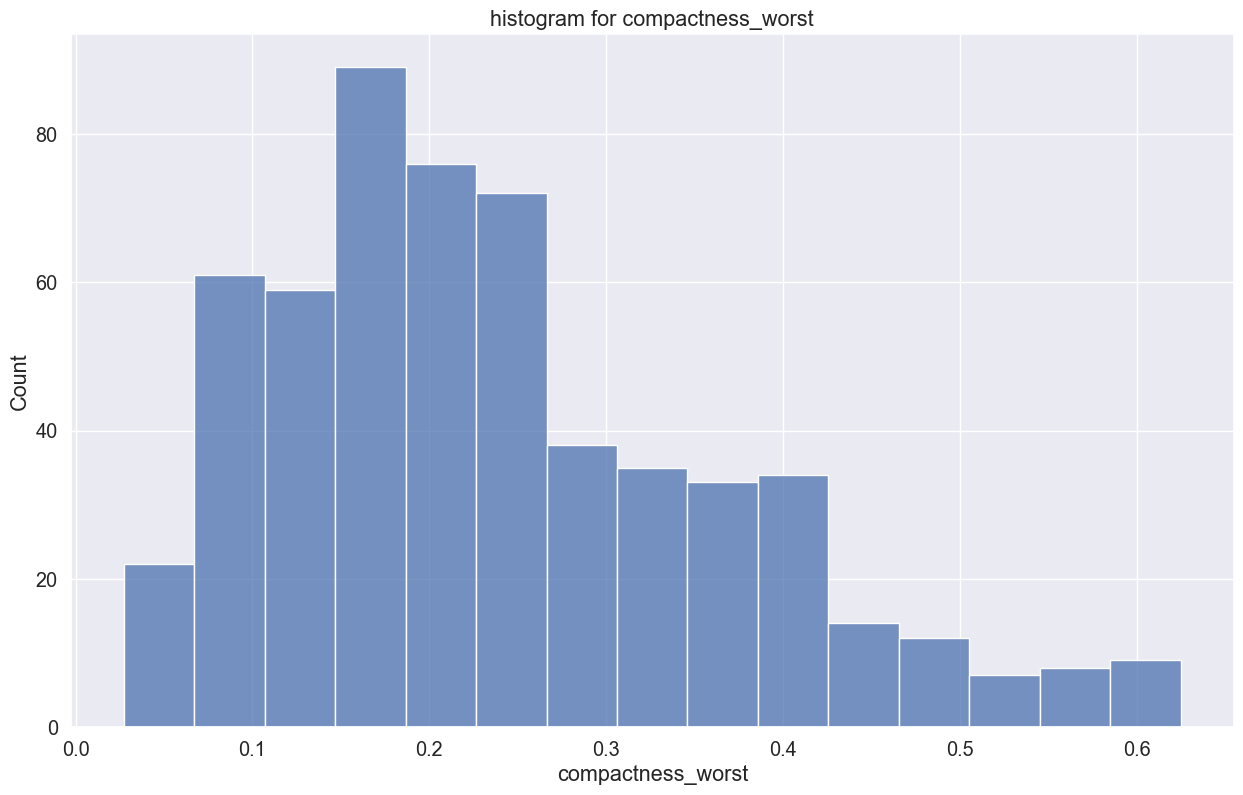

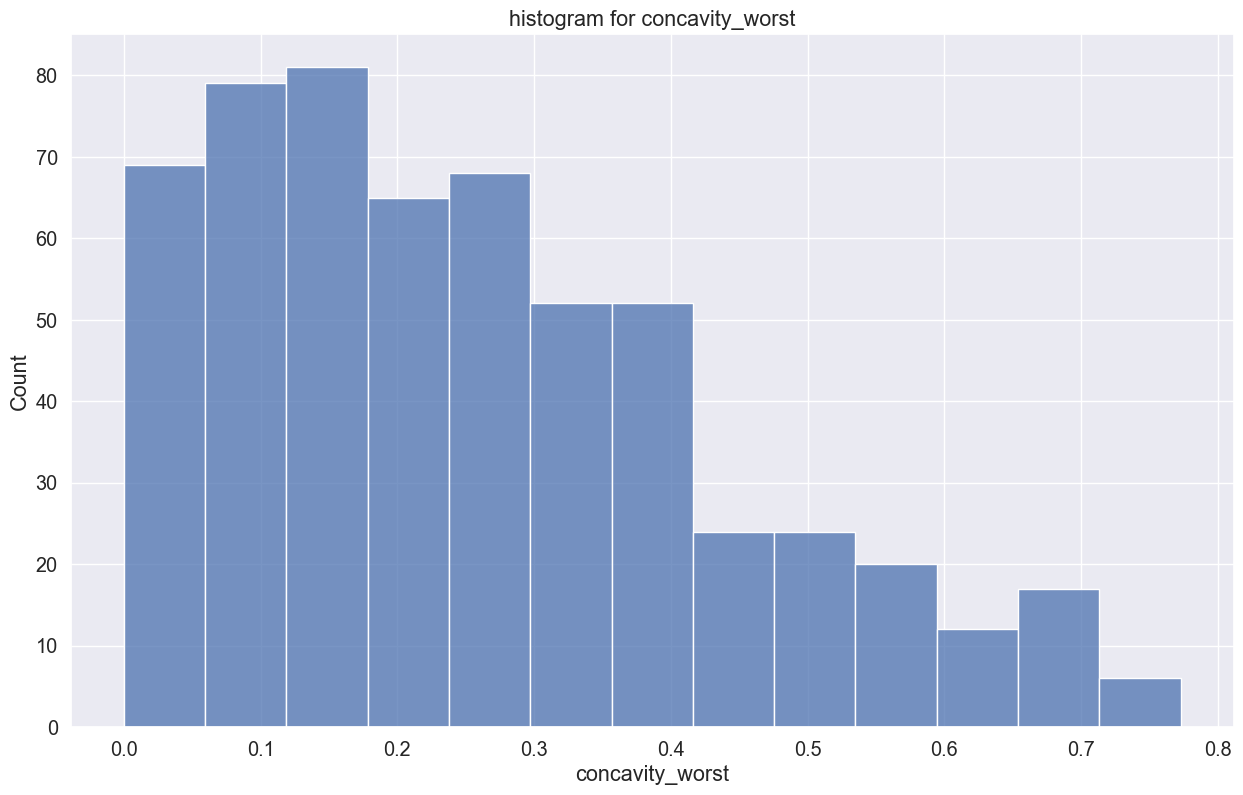

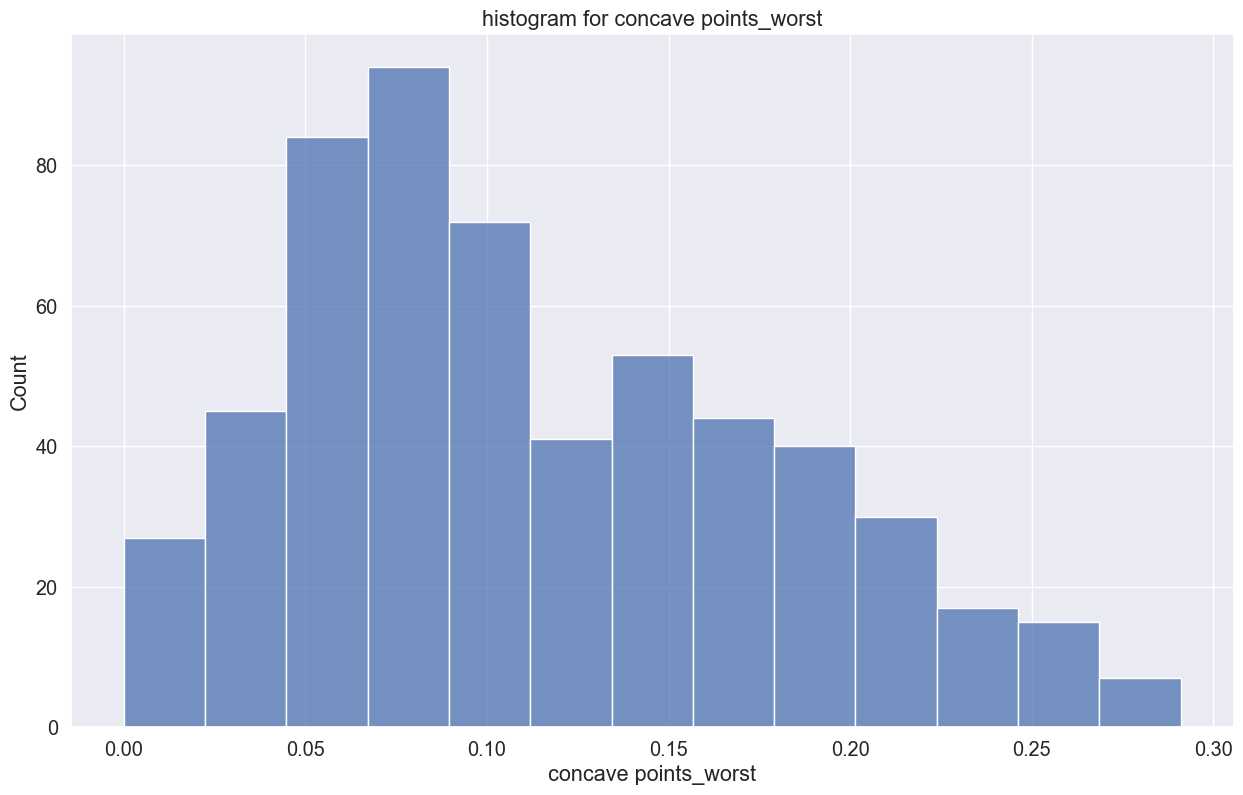

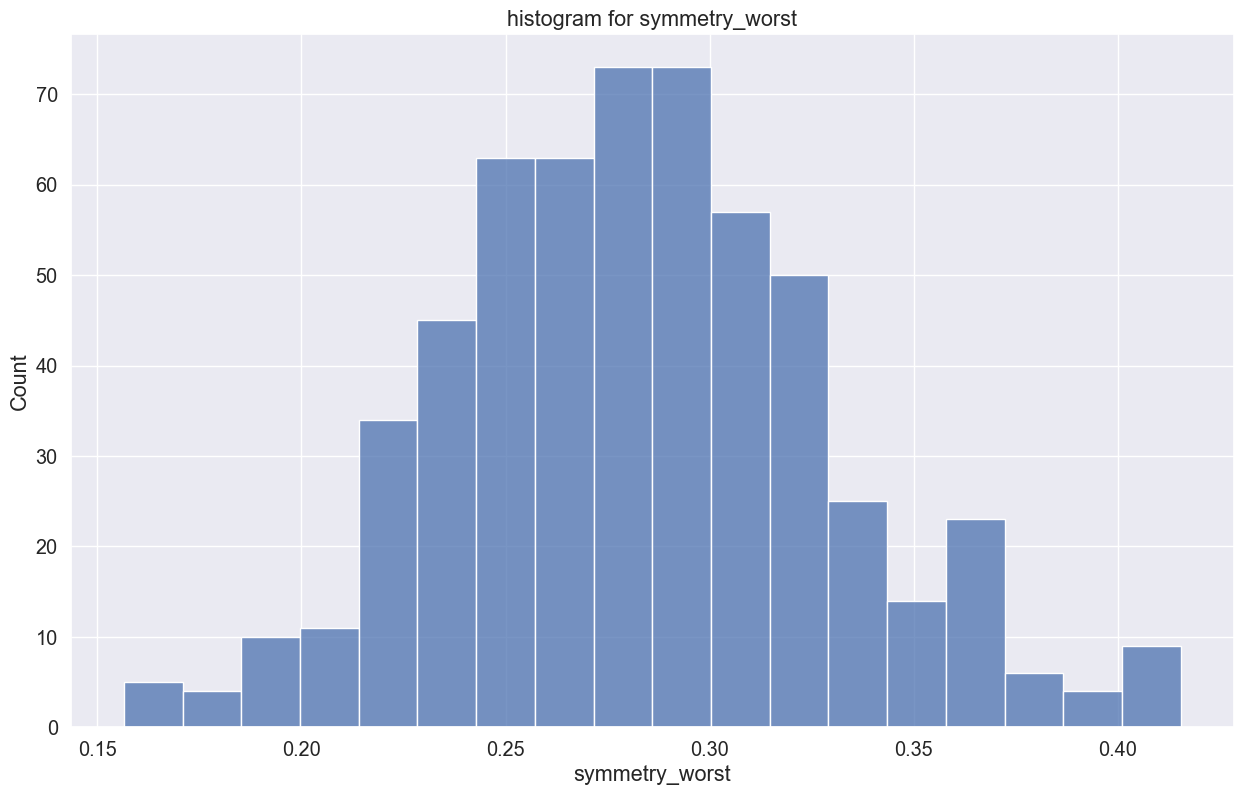

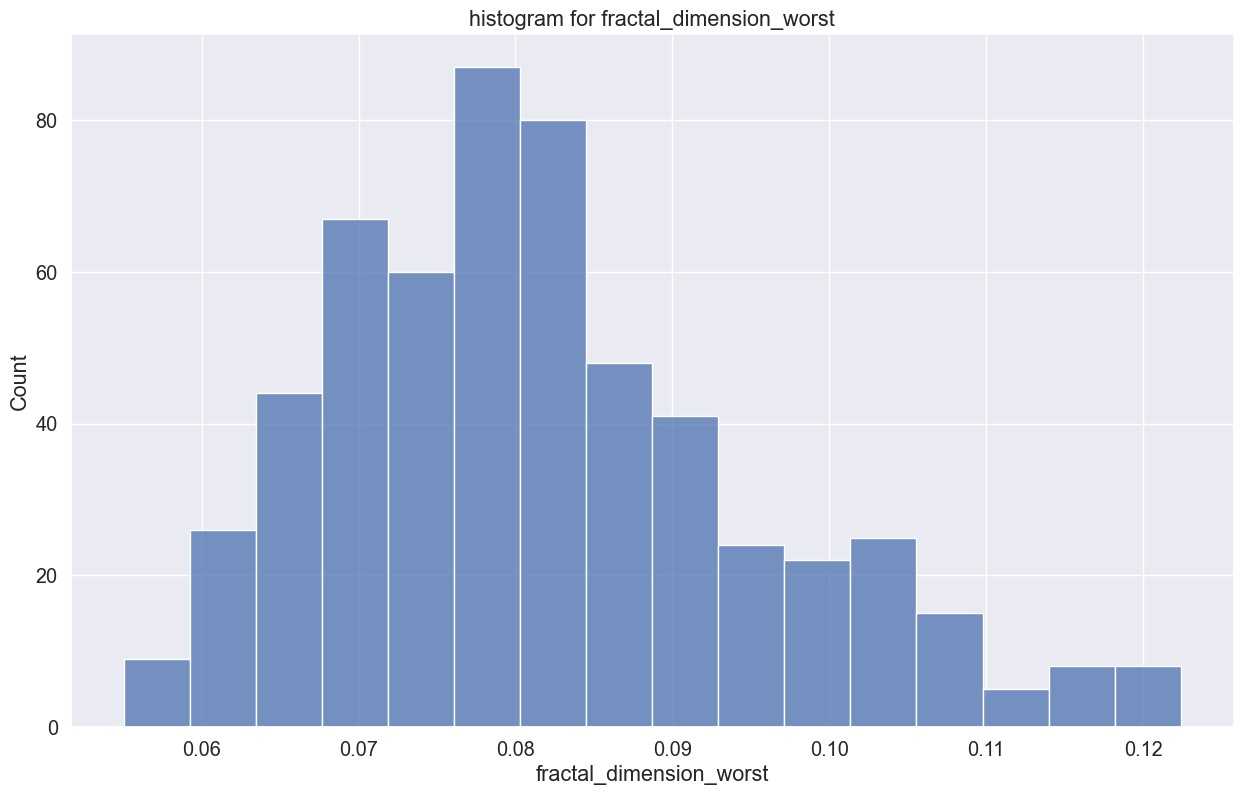

In [14]:
for col in df.columns:
        if  ((df[col].dtype == np.float64) | (df[col].dtype == np.int64)):
            plt.figure()
            sns.histplot(x=col,data=df)
            plt.title('histogram for '+col)
            plt.show()
        else :
            counts = df[col].value_counts()
            plt.figure()
            plt.pie(counts, labels=counts.index,autopct='%1.1f%%')
            plt.title('pie plot for ' + col)
            plt.show()


### most of features is normally distributed

In [15]:
# label encoding
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])
df.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

## MinMax Scaler & dimintionlity reduction

In [16]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV ,train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [17]:
x = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [18]:
# Use SelectKBest to select the top 65 features based on f_regression scores
select = SelectKBest(score_func=f_regression, k=20)
select.fit(x, y)

# Get the selected features
selected_feature = x.columns[select.get_support()]

# Print the selected features
print(selected_feature)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'concavity_se',
       'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


In [19]:
x = df[selected_feature]

In [20]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [22]:
print('x_train shape : ',x_train.shape)
print('x_test shape : ',x_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

x_train shape :  (426, 20)
x_test shape :  (143, 20)
y_train shape :  (426,)
y_test shape :  (143,)


# build the model
this problem is a classification problem so we choose to apply :
1- logistic regression
2- decision tree
3- random forest
4- navie bais

## 1- logistic regression

In [23]:
lr = LogisticRegression()

In [24]:
model = lr.fit(x_train, y_train)
log_train = model.predict(x_train)
log_pred = model.predict(x_test)

In [25]:
print('Accuracy Score on train data: ', accuracy_score(y_train, log_train))
print("logistic regression test Accuracy:", accuracy_score(y_test, log_pred))

Accuracy Score on train data:  0.960093896713615
logistic regression test Accuracy: 0.965034965034965


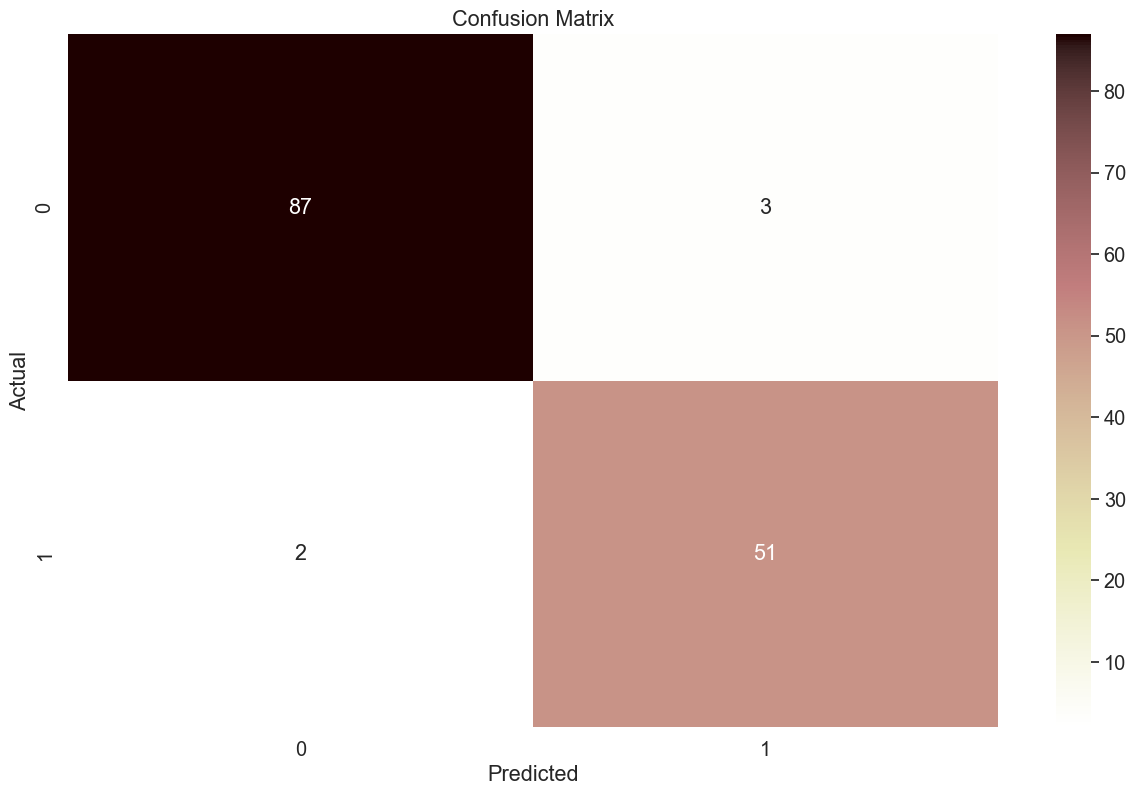

In [26]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, log_pred)
# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d",cmap='pink_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
print('\nlogistic regression report : \n\n',classification_report(y_test,log_pred))


logistic regression report : 

               precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



## 2- Decision Tree

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.naive_bayes import GaussianNB

In [29]:
dt = DecisionTreeClassifier(random_state=40)

In [30]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=40)

In [31]:
dt.get_params() 

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 40,
 'splitter': 'best'}

In [32]:
y_train_pred = dt.predict(x_train)
dt_pred = dt.predict(x_test)

In [33]:
print('accuracy score : ',accuracy_score(y_train, y_train_pred))
print('accuracy score : ',accuracy_score(y_test, dt_pred))

accuracy score :  1.0
accuracy score :  0.9020979020979021


In [34]:
dt.predict_proba(x_test[1:10])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

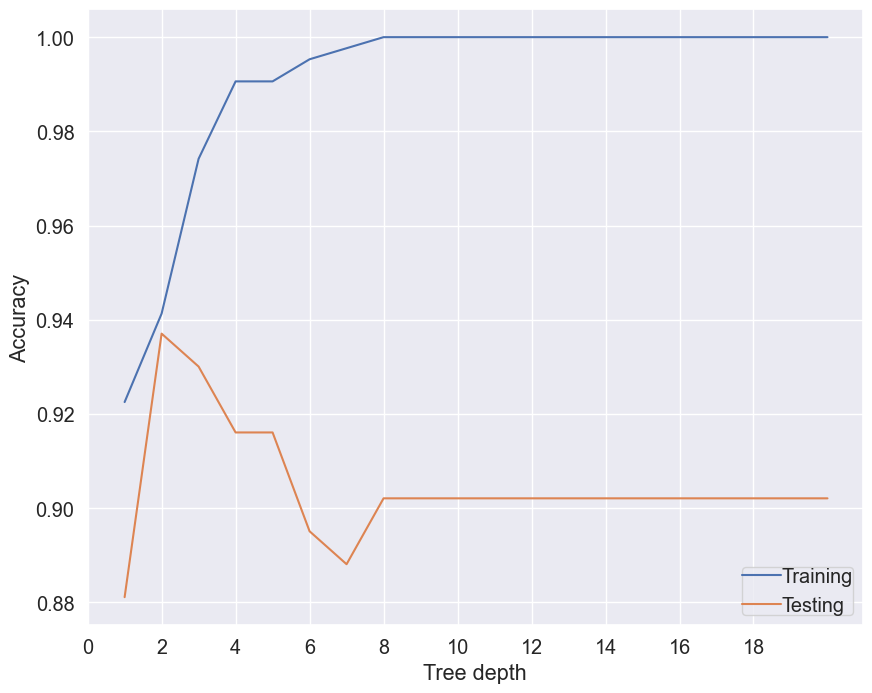

In [35]:
max_depth = np.linspace(1,20,20,dtype='int32')
accuracy_train,accuracy_test=[],[]

for i in max_depth:
    dt=DecisionTreeClassifier(max_depth=i, random_state=40)
    dt.fit(x_train,y_train)
    y_train_pred = dt.predict(x_train)
    y_test_pred = dt.predict(x_test)
    
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test, y_test_pred))

ax= plt.figure(figsize=(10, 8))
plt.plot(max_depth,accuracy_train)
plt.plot(max_depth,accuracy_test)
plt.xticks(np.arange(0,20,2))
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.legend(['Training', 'Testing'],loc='lower right', borderpad=0, handletextpad=0) 
plt.show()

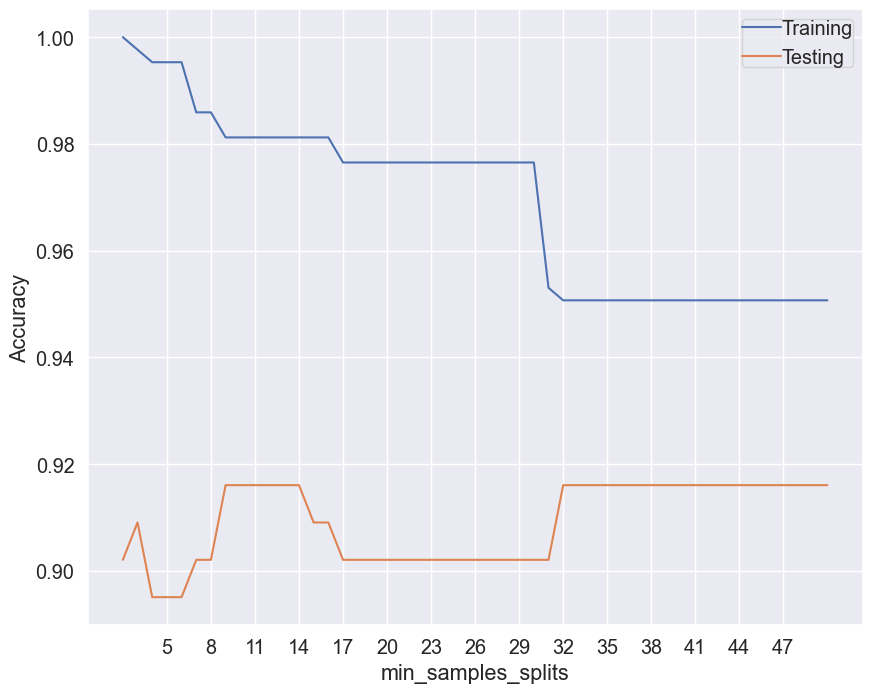

In [36]:
min_samples_split = np.linspace(2, 50, 50,dtype='int32')
accuracy_train,accuracy_test=[],[]

for i in min_samples_split:
    dt=DecisionTreeClassifier(min_samples_split=i, random_state=40)
    dt.fit(x_train,y_train)
    y_train_pred = dt.predict(x_train)
    y_test_pred = dt.predict(x_test)
    
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test, y_test_pred))

ax= plt.figure(figsize=(10, 8))
plt.plot(min_samples_split,accuracy_train)
plt.plot(min_samples_split,accuracy_test)
plt.xticks(np.arange(5,50,3))
plt.ylabel('Accuracy')
plt.xlabel('min_samples_splits')
plt.legend(['Training', 'Testing'],loc='upper right', borderpad=0, handletextpad=0) 
plt.show()

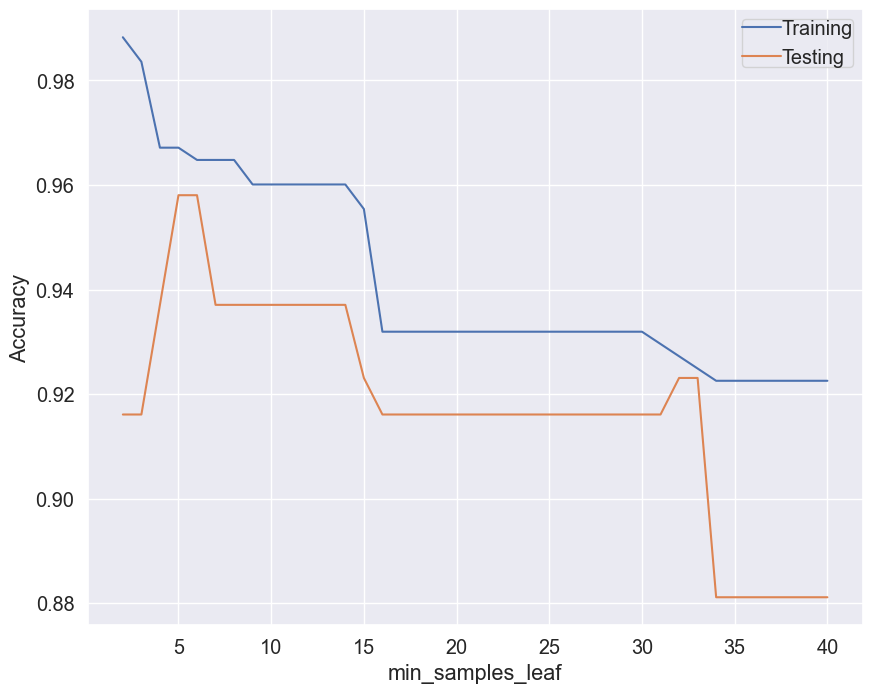

In [37]:
min_samples_leaf = np.linspace(2, 40, 40, dtype='int32')
accuracy_train = []
accuracy_test = []
for leaf in min_samples_leaf:
    dt = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=40)
    dt.fit(x_train, y_train)
    y_train_pred = dt.predict(x_train)
    y_test_pred = dt.predict(x_test)

    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test, y_test_pred))
    
plt.figure(figsize=(10, 8))
plt.plot(min_samples_leaf, accuracy_train)
plt.plot(min_samples_leaf, accuracy_test)
plt.ylabel('Accuracy')
plt.xlabel('min_samples_leaf')
plt.legend(['Training', 'Testing'], loc='upper right', borderpad=0, handletextpad=0)
plt.show()

In [38]:
Tuned_tree = DecisionTreeClassifier(random_state=40,max_depth=2, min_samples_split=35,min_samples_leaf=6)
Tuned_tree.fit(x_train,y_train)
y_train_pred = Tuned_tree.predict(x_train)
y_test_pred = Tuned_tree.predict(x_test)

#Use accuracy metric from sklearn.metrics library
print('Accuracy Score on train data: ',accuracy_score(y_train, y_train_pred))
print('Accuracy Score on test data: ',accuracy_score(y_test, y_test_pred))

Accuracy Score on train data:  0.9413145539906104
Accuracy Score on test data:  0.9370629370629371


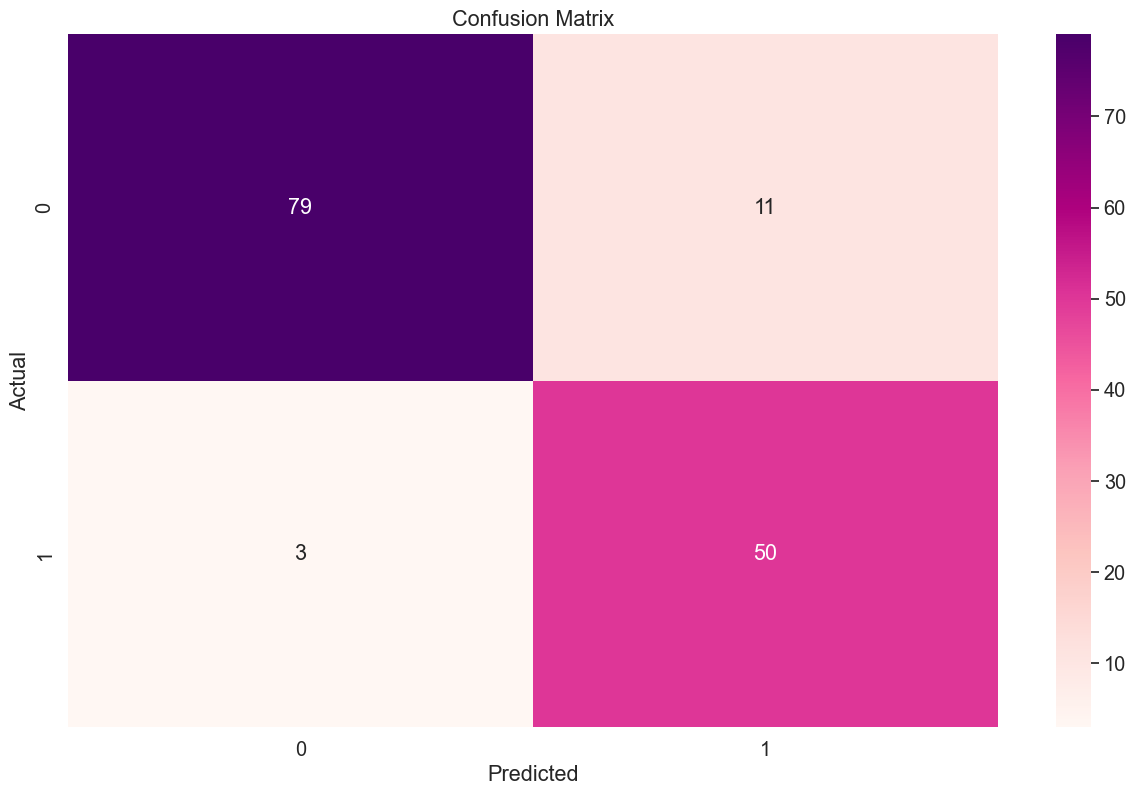

In [39]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, dt_pred)
# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d",cmap='RdPu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
print('\ndecision tree report : \n\n',classification_report(y_test,dt_pred))


decision tree report : 

               precision    recall  f1-score   support

           0       0.96      0.88      0.92        90
           1       0.82      0.94      0.88        53

    accuracy                           0.90       143
   macro avg       0.89      0.91      0.90       143
weighted avg       0.91      0.90      0.90       143



<Figure size 1500x900 with 0 Axes>

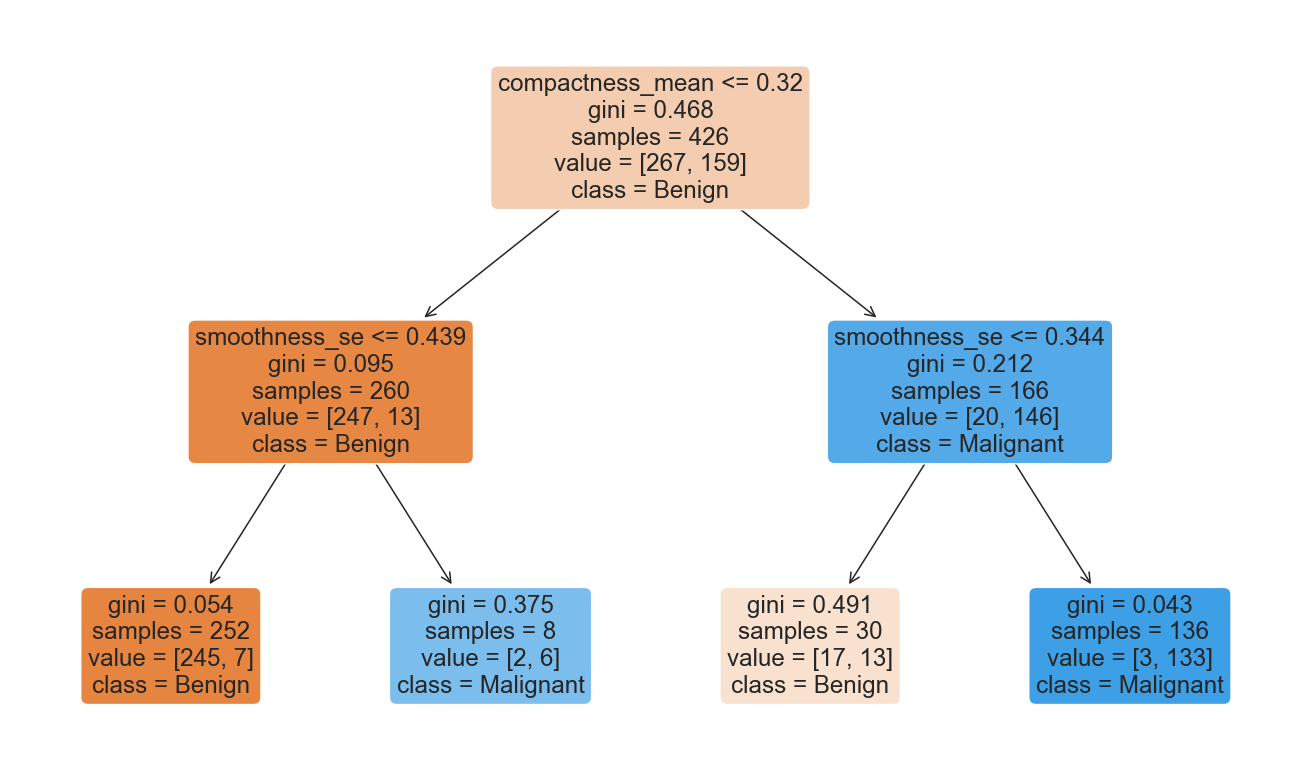

In [41]:
plt.figure()
fig, axes = plt.subplots(nrows = 1,ncols = 1, dpi=110)
plot_tree(Tuned_tree, feature_names = df.columns.tolist(),class_names=['Benign','Malignant'],filled = True,rounded=True)
plt.show()

## 3- Random Forest 

In [42]:
rf=RandomForestClassifier(random_state=40)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=40)

In [43]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 40,
 'verbose': 0,
 'warm_start': False}

In [44]:
rf_train_pred = rf.predict(x_train)
rf_pred = rf.predict(x_test)

In [45]:
print('Accuracy Score on train data: ',accuracy_score(y_train, rf_train_pred))
print("Random Forest test Accuracy:", accuracy_score(y_test, rf_pred))

Accuracy Score on train data:  1.0
Random Forest test Accuracy: 0.965034965034965


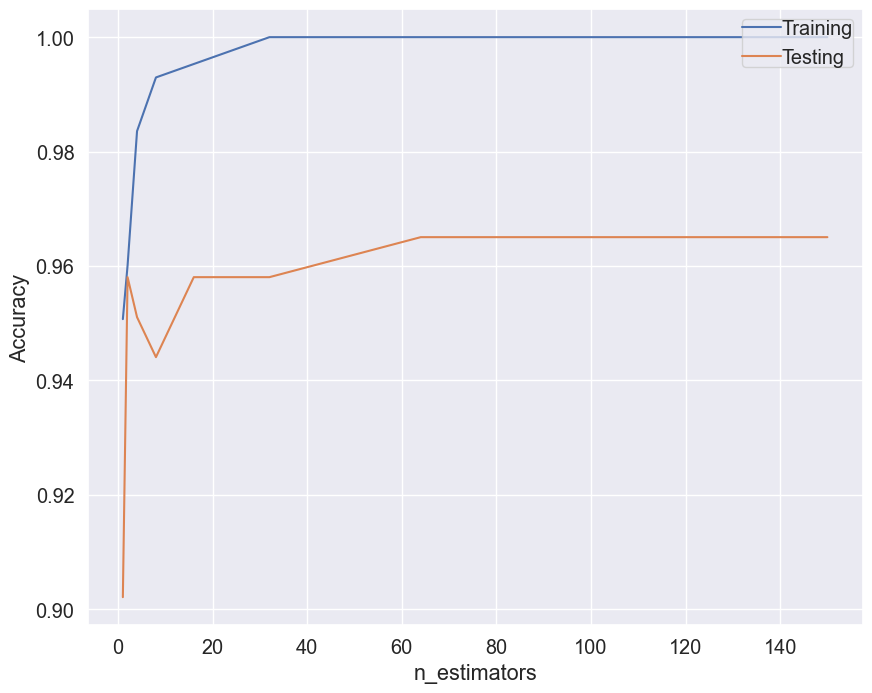

In [46]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100 , 150]
accuracy_train,accuracy_test=[],[]

for i in n_estimators:
    rf=RandomForestClassifier(n_estimators=i, random_state=40)
    rf.fit(x_train,y_train)
    y_train_pred = rf.predict(x_train)
    y_test_pred = rf.predict(x_test)
    
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test, y_test_pred))

ax= plt.figure(figsize=(10, 8))
plt.plot(n_estimators,accuracy_train)
plt.plot(n_estimators,accuracy_test)
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.legend(['Training', 'Testing'],loc='upper right', borderpad=0, handletextpad=0) 
plt.show()


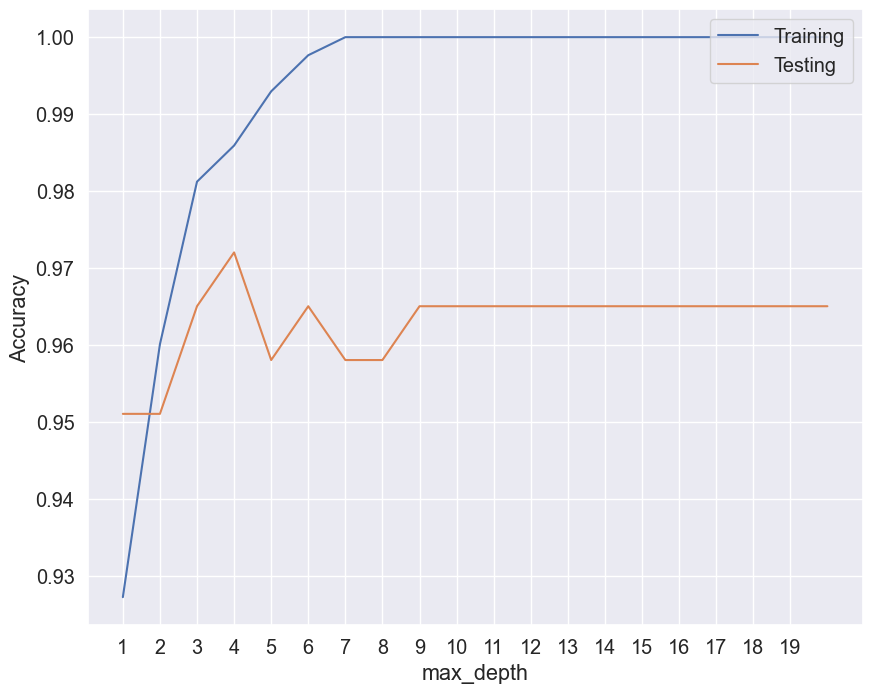

In [47]:
max_depth = np.linspace(1,20,20,dtype='int32')
accuracy_train,accuracy_test=[],[]

for i in max_depth:
    rf=RandomForestClassifier(max_depth=i, random_state=40)
    rf.fit(x_train,y_train)
    y_train_pred = rf.predict(x_train)
    y_test_pred = rf.predict(x_test)
    
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test, y_test_pred))

ax= plt.figure(figsize=(10, 8))
plt.plot(max_depth,accuracy_train)
plt.plot(max_depth,accuracy_test)
plt.xticks(np.arange(1,20,1))
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.legend(['Training', 'Testing'],loc='upper right') 
plt.show()

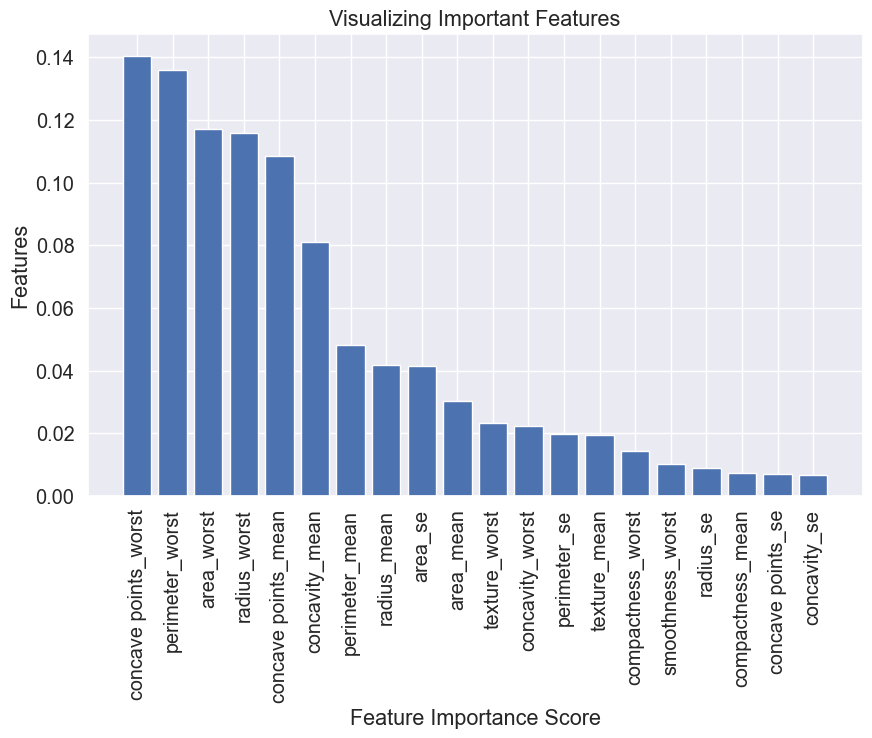

In [48]:
feature_imp = pd.Series(rf.feature_importances_, index=df[selected_feature].columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(feature_imp.index,feature_imp)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.tick_params(axis='x', rotation=90)
plt.title("Visualizing Important Features");

In [49]:
new_x = df[selected_feature].drop(columns=['area_mean','texture_worst','concavity_worst','perimeter_se',
                                           'texture_mean','compactness_worst','smoothness_worst',
                                            'radius_se','compactness_mean','concave points_se','concavity_se'],axis=1)

In [50]:
new_x.head()

,radius_mean,perimeter_mean,concavity_mean,concave points_mean,area_se,radius_worst,perimeter_worst,area_worst,concave points_worst
0,17.99,122.80,0.088799,0.14710,40.337079,25.38,184.60,880.583128,0.2654
1,20.57,132.90,0.086900,0.07017,74.080000,24.99,158.80,880.583128,0.1860
2,19.69,130.00,0.197400,0.12790,40.337079,23.57,152.50,1709.000000,0.2430
3,11.42,77.58,0.241400,0.10520,27.230000,14.91,98.87,567.700000,0.2575
4,20.29,135.10,0.198000,0.10430,40.337079,22.54,152.20,1575.000000,0.1625


In [51]:
scaler = MinMaxScaler()
x = scaler.fit_transform(new_x)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [53]:
print('x_train shape : ',x_train.shape)
print('x_test shape : ',x_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

x_train shape :  (426, 9)
x_test shape :  (143, 9)
y_train shape :  (426,)
y_test shape :  (143,)


In [54]:
new_rf = RandomForestClassifier(n_estimators=80,max_depth=4, random_state=40)

#Train the model using the training data
new_rf.fit(x_train, y_train)

rf_train_pred = new_rf.predict(x_train)
rf_test_pred = new_rf.predict(x_test)

In [55]:
print('Accuracy Score on train data: ', accuracy_score(y_train, rf_train_pred))
print("Random Forest test Accuracy:", accuracy_score(y_test, rf_test_pred))

Accuracy Score on train data:  0.9835680751173709
Random Forest test Accuracy: 0.965034965034965


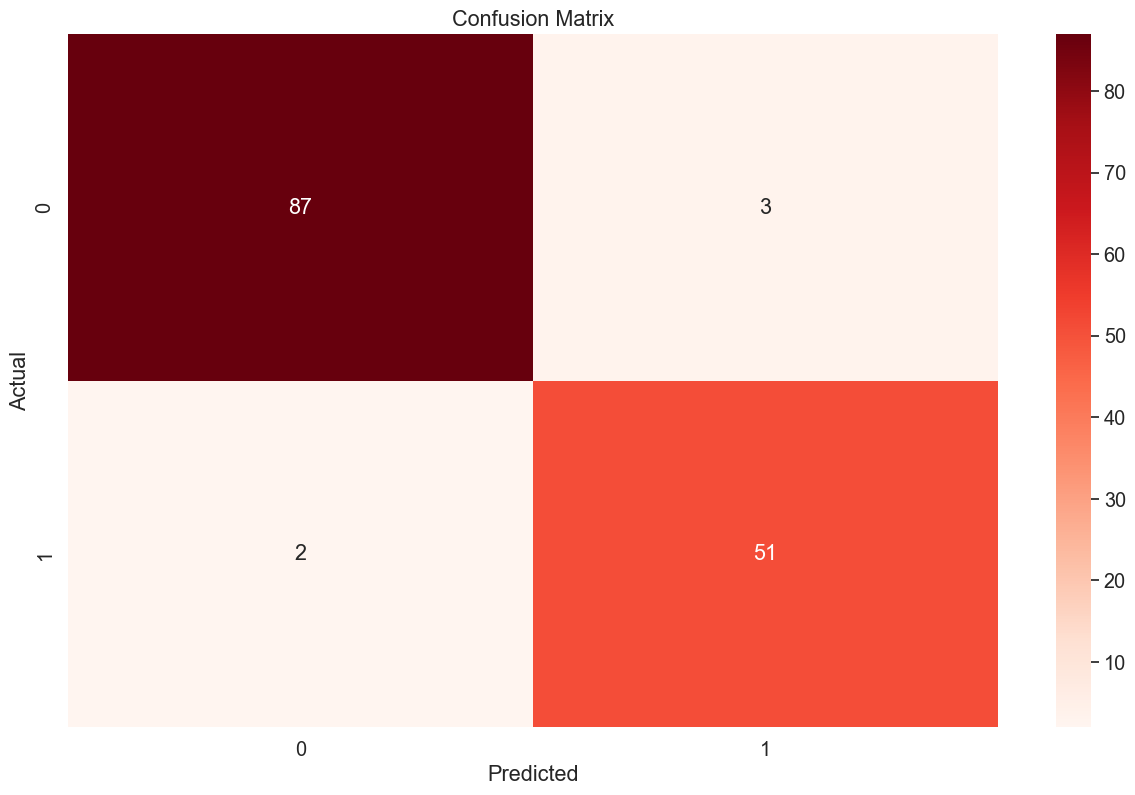

In [56]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, rf_test_pred)
# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d",cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [57]:
print('\nRandom Forest report : \n\n',classification_report(y_test,rf_test_pred))


Random Forest report : 

               precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



## 4- Naive Bayes

In [58]:
nbc = GaussianNB()
nbc.fit(x_train,y_train)
nb_train_pred = nbc.predict(x_train)
nb_test_pred = nbc.predict(x_test)

In [59]:
print('Accuracy Score on train data: ',accuracy_score(y_train, nb_train_pred))
print("Random Forest test Accuracy:", accuracy_score(y_test, nb_test_pred))

Accuracy Score on train data:  0.9507042253521126
Random Forest test Accuracy: 0.9300699300699301


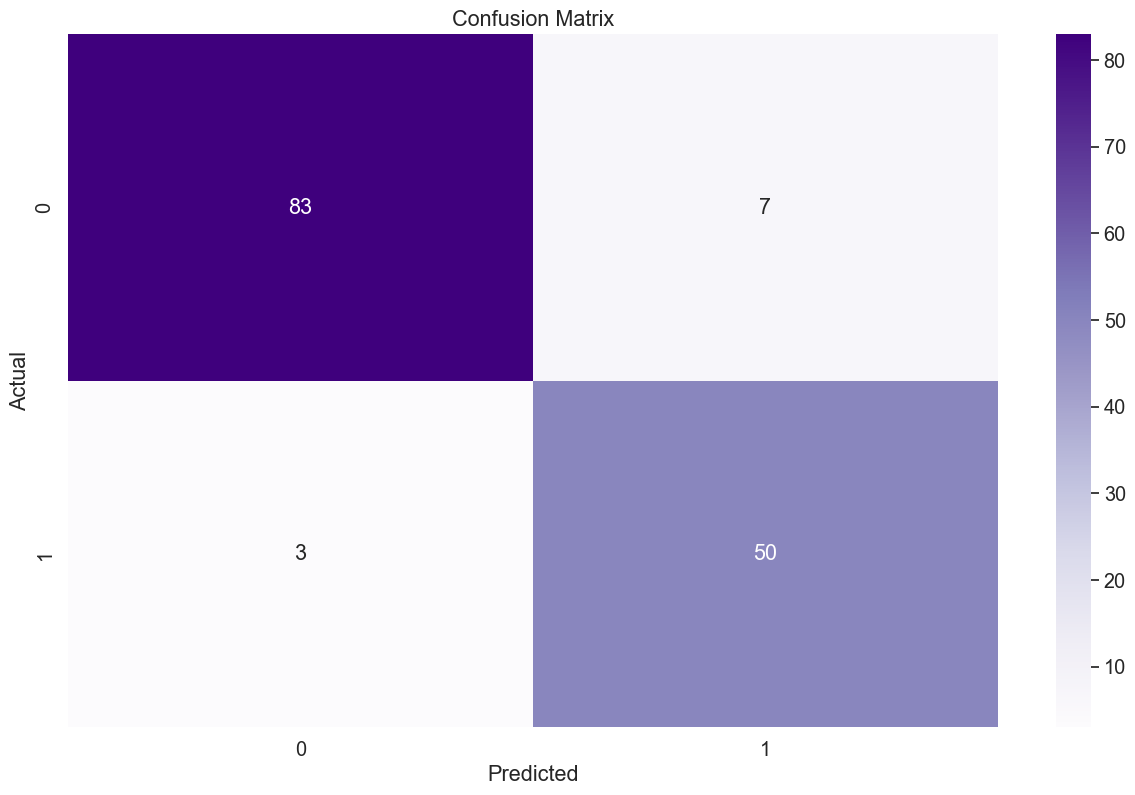

In [60]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, nb_test_pred)
# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d",cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [61]:
print('\nNaive Bayes report : \n\n',classification_report(y_test,nb_test_pred))


Naive Bayes report : 

               precision    recall  f1-score   support

           0       0.97      0.92      0.94        90
           1       0.88      0.94      0.91        53

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



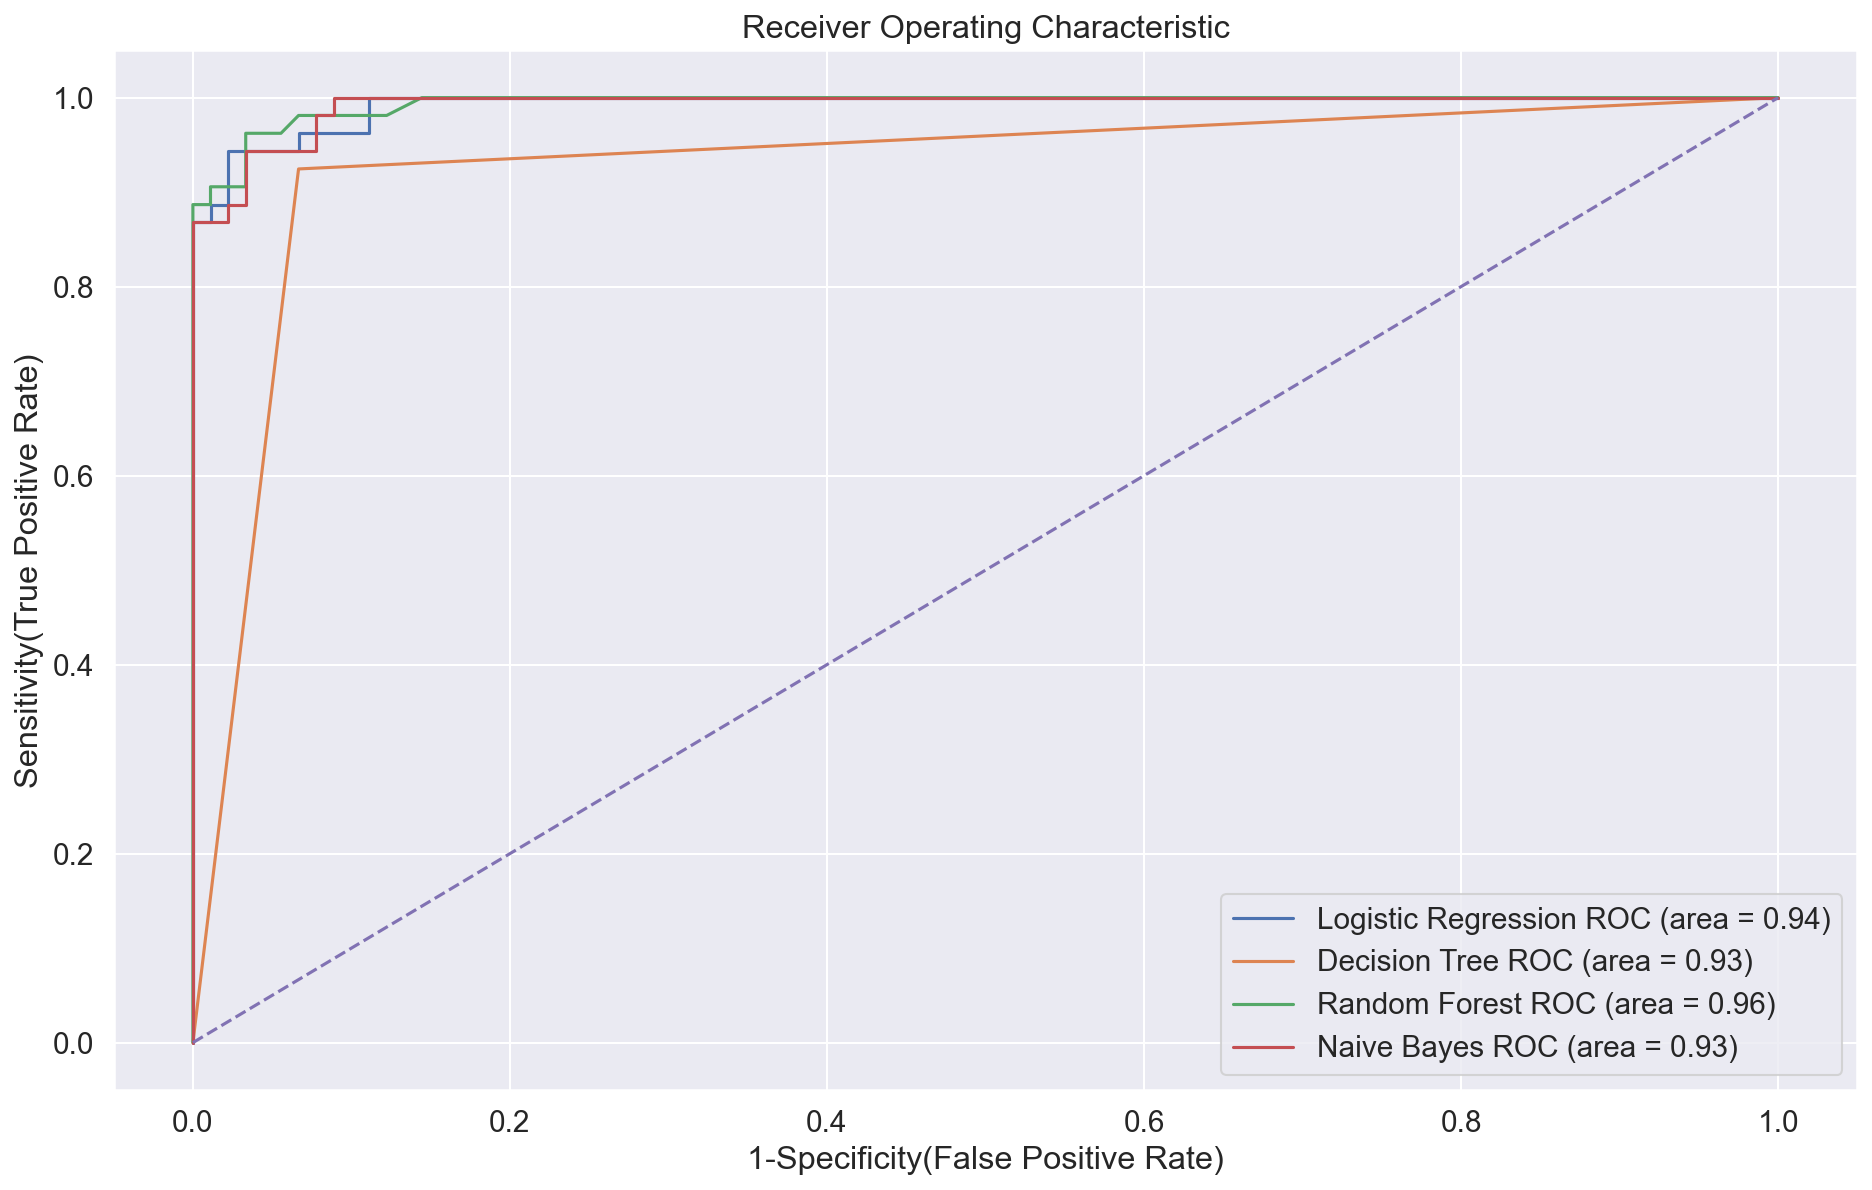

In [62]:
plt.figure(dpi=150)

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(),
},
{
    'label': 'Naive Bayes',
    'model': GaussianNB(),
}    
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] 
    model.fit(x_train, y_train) 
    y_pred=model.predict(x_test) 
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_test,model.predict(x_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'--')
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show() 